# Predicting House Prices using the King County Housing Dataset
### By: Olalekan Hammed (Stephen)

In [355]:
# Google colab specific code
from google.colab import drive
drive.mount('/content/drive')
from google.colab import data_table
data_table.enable_dataframe_formatter()
#data_table.disable_dataframe_formatter()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


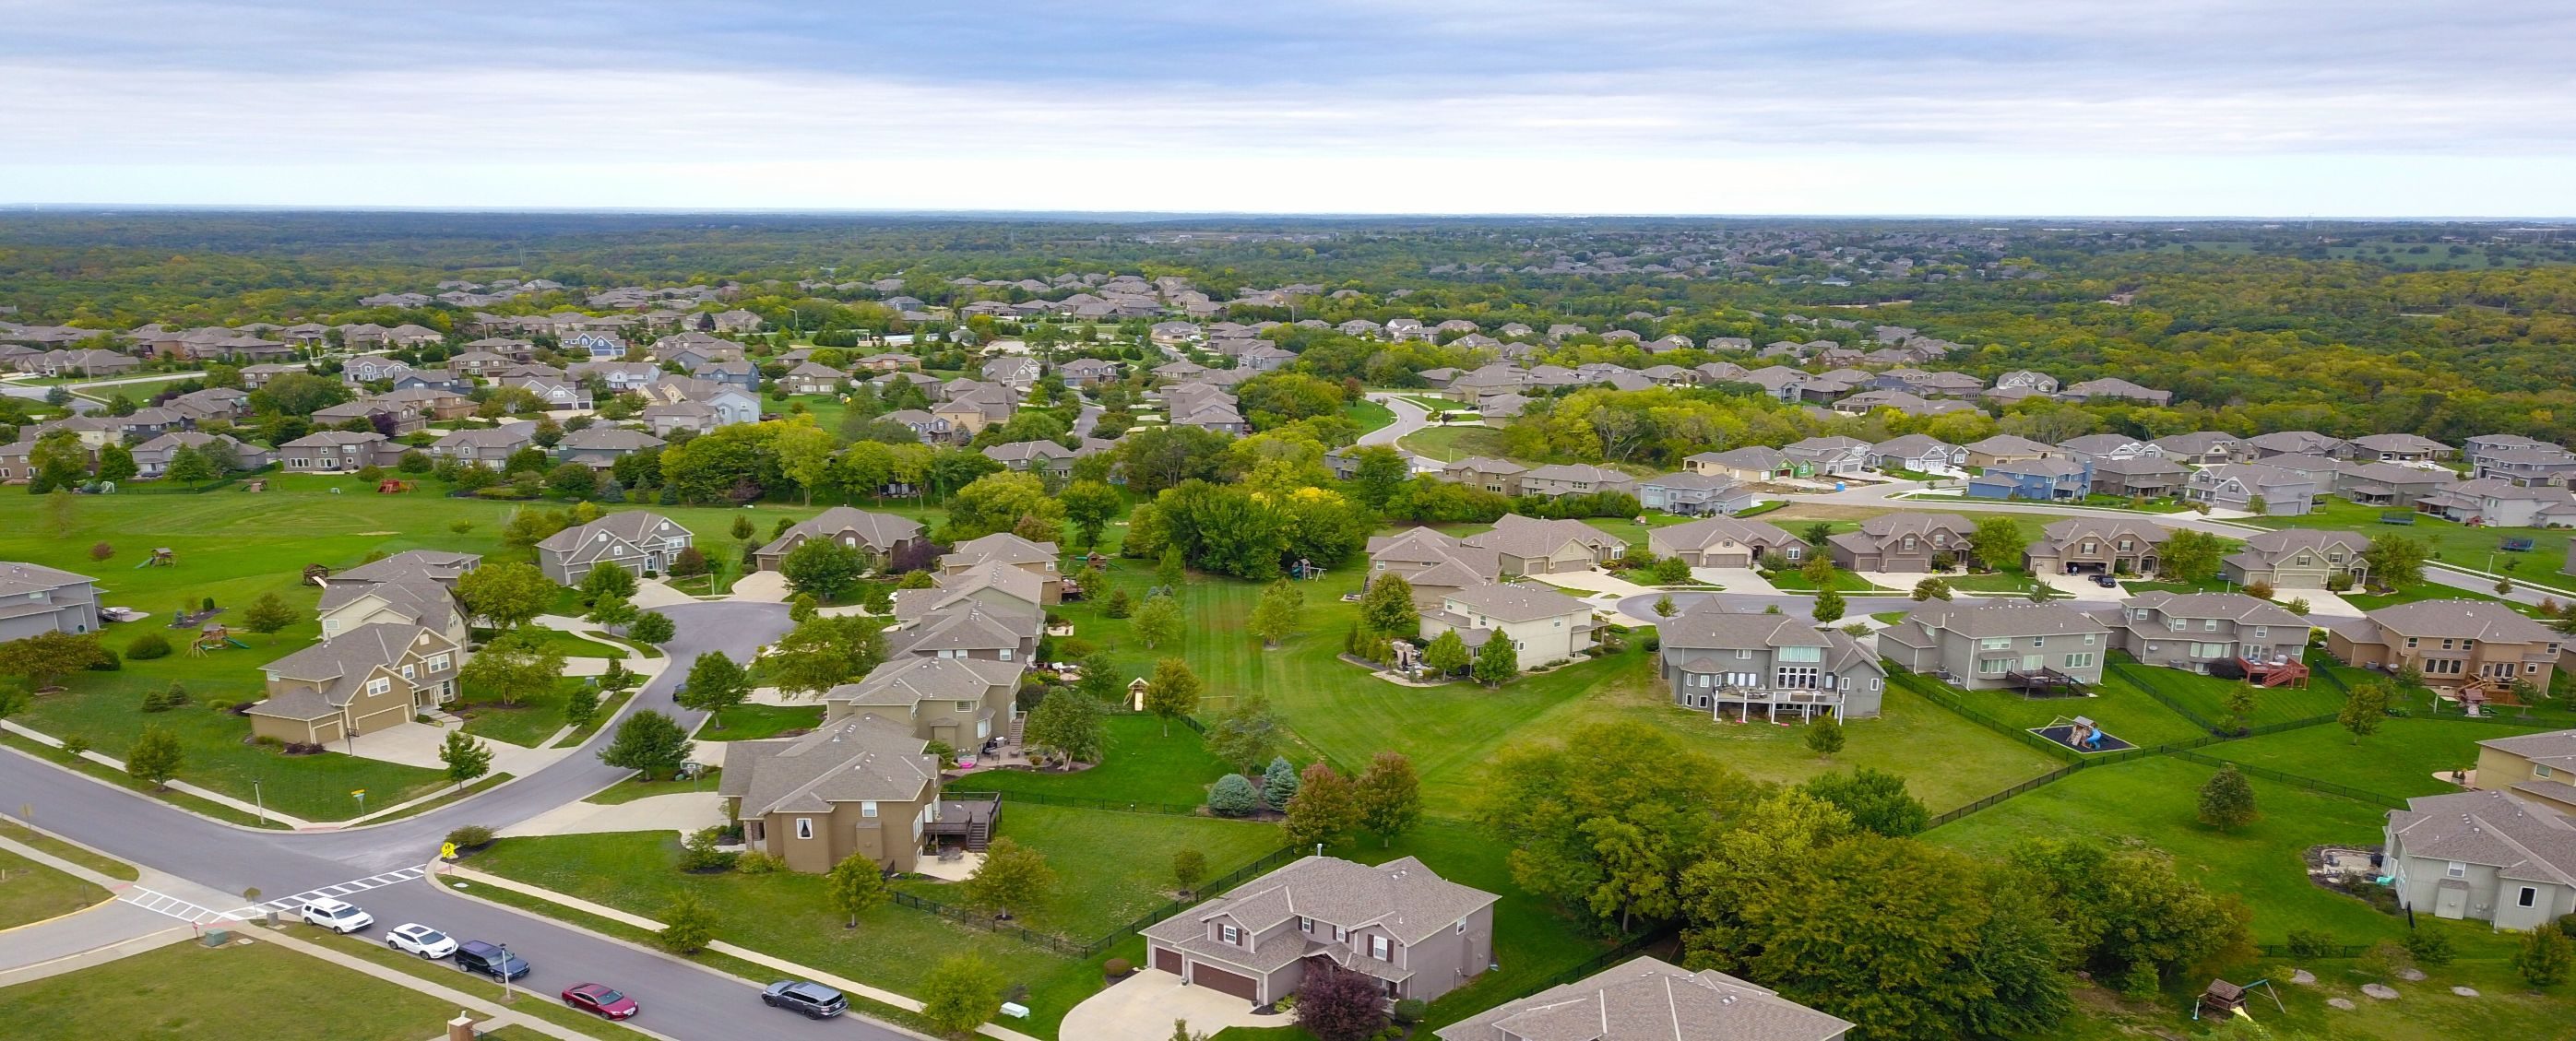

## Business Understanding
- The objective of this project is to model real estate prices in Kings County, 
Washington, USA. It is my intention that the model will be able to accurately predict housing prices based on a number of property variables provided within the dataset with which the model is built. 
- The expectation is that the model can be used by Real Estate investors and stakeholders operating in the Kings County area as a tool to guild financial and business decisions.

## Data Understanding
- We will be using the Kings County Housing dataset, kc_house_dataas provided by Flatiron School. The dataset contains 25 columns with inforamation about the size, location, condition, and other features of houses in King County. 
- One of the column is of the prices of the house and that will represent the ***dependent*** or ***target*** variable, that is, the column which value is to be predicted based on the other columns which are referred to as the ***independent*** or ***predictor*** variables. A full description of the dataset's columns can be found below:

- *id - unique identified for a house*

***Continous Variables***
- *price - sale price which is prediction target*
- *sqft_living - footage of the home*
- *sqft_lot - footage of the lot*
- *sqft_above - square footage of house apart from basement*
- *sqft_basement - square footage of the basement*
- *sqft_garage -  square footage of garage space*
- *sqft_patio - Square footage of outdoor porch or deck space*

**Categorical Variables**

*Intriniscially continous, but limited range so makes sense to categorize:*
- *bedrooms - of Bedrooms/House*
- *bathrooms - of bathrooms/bedrooms*
- *floors - floors (levels) in house*

*Strictly categorical:*
- *waterfront - whether the house is on a waterfront*
- *greenbelt - whether the house is adjacent to a green belt*     
- *nuisance  - whether the house has traffic noise or other recorded nuisances*
- *view - quality of view from house*
- *condition - how good the condition is ( Overall )*
- *grade - overall grade given to the housing unit, based on King County grading system*
- *heat_source  -  heat source for the house*
- *sewer_system -  sewer system for the house*

**Dates**
- *date - house was sold*
- *yr_built - year the house was built*
- *yr_renovated - year when house was renovated*

**Nominal**
- *address - the street address*
- *lat - Latitude coordinate*
- *long - Longitude coordinate*

## 1.0 Data Preparation

### 1.1 Loading the Data

In [356]:
#load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [357]:

# set the max columns to none
pd.set_option('display.max_columns', None)

In [358]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Flatiron/Phase 4/Project/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [359]:
data.shape

(30155, 25)

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

- The dataframe contains 25 columns and 30,155 rows. 
- Since **price** is the target variable and **id** is irrelevant, we have 23 features to construct the model.
- From this information, I can see that variables *heat_source* and *sewer_system* have null value
- In the Data Cleaning section below, I examine the proportions, get the value count, treat the missing values in each of the columns and  I drop the id column amongst other tasks.

## 2.0 Data Exploration

In [361]:
# get proportion of missing values
for column in data.columns:
  na_percent = (sum(data[column].isnull())/len(data[column])) * 100 
  print(column, round(na_percent, 2))

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
greenbelt 0.0
nuisance 0.0
view 0.0
condition 0.0
grade 0.0
heat_source 0.11
sewer_system 0.05
sqft_above 0.0
sqft_basement 0.0
sqft_garage 0.0
sqft_patio 0.0
yr_built 0.0
yr_renovated 0.0
address 0.0
lat 0.0
long 0.0


In [362]:
# get descriptive statistics of df
round(data.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.00,30155.00,30155.00,30155.00,30155.0,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4.538104e+09,1108535.84,3.41,2.33,2112.42,16723.6,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2.882587e+09,896385.66,0.98,0.89,974.04,60382.6,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1.000055e+06,27360.00,0.00,0.00,3.00,402.0,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2.064175e+09,648000.00,3.00,2.00,1420.00,4850.0,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3.874011e+09,860000.00,3.00,2.50,1920.00,7480.0,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7.287100e+09,1300000.00,4.00,3.00,2619.50,10579.0,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9.904000e+09,30750000.00,13.00,10.50,15360.00,3253932.0,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


### 2.1 Data Cleaning



```
# Convert date column to datetime
```



In [363]:
# Convert date sold column to datetime in case we want to work with later 
data['date']=pd.to_datetime(data['date'])

The heat_source and sewer_system variables have missing values. Let's inspect the value counts for each of these columns.

In [364]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [365]:
print(data.heat_source.isna().sum())

32


In [366]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [367]:
print(data.sewer_system.isna().sum())

14


Because **heat_source** and **sewer_system** have just 32 and 14 missing values respectively, and because they are categorical variables I decide to replace the missing values with **Gas** and **PUBLIC** being the categories with the highest number of entries respectively.

In [368]:
# replace missing values for heat_source
data['heat_source'].fillna('Gas', inplace=True)

In [369]:
# replace missing values for sewer_system
data['sewer_system'].fillna('PUBLIC', inplace=True)

In [370]:
# confirm that missing values have been taken care of
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [371]:
# checking uniqueness of the id column
data.shape[0] - data.id.nunique()

1

Since there just one duplicate in the **id** columns, which indicates perhaps that the particular buildng was sold twice or perhaps to data entry error, we can ignore and go ahead to remove the column as it unique identifier with relationship with the property as a feature.

In [372]:
# drop id column
data.drop(['id'], axis=1, inplace=True)

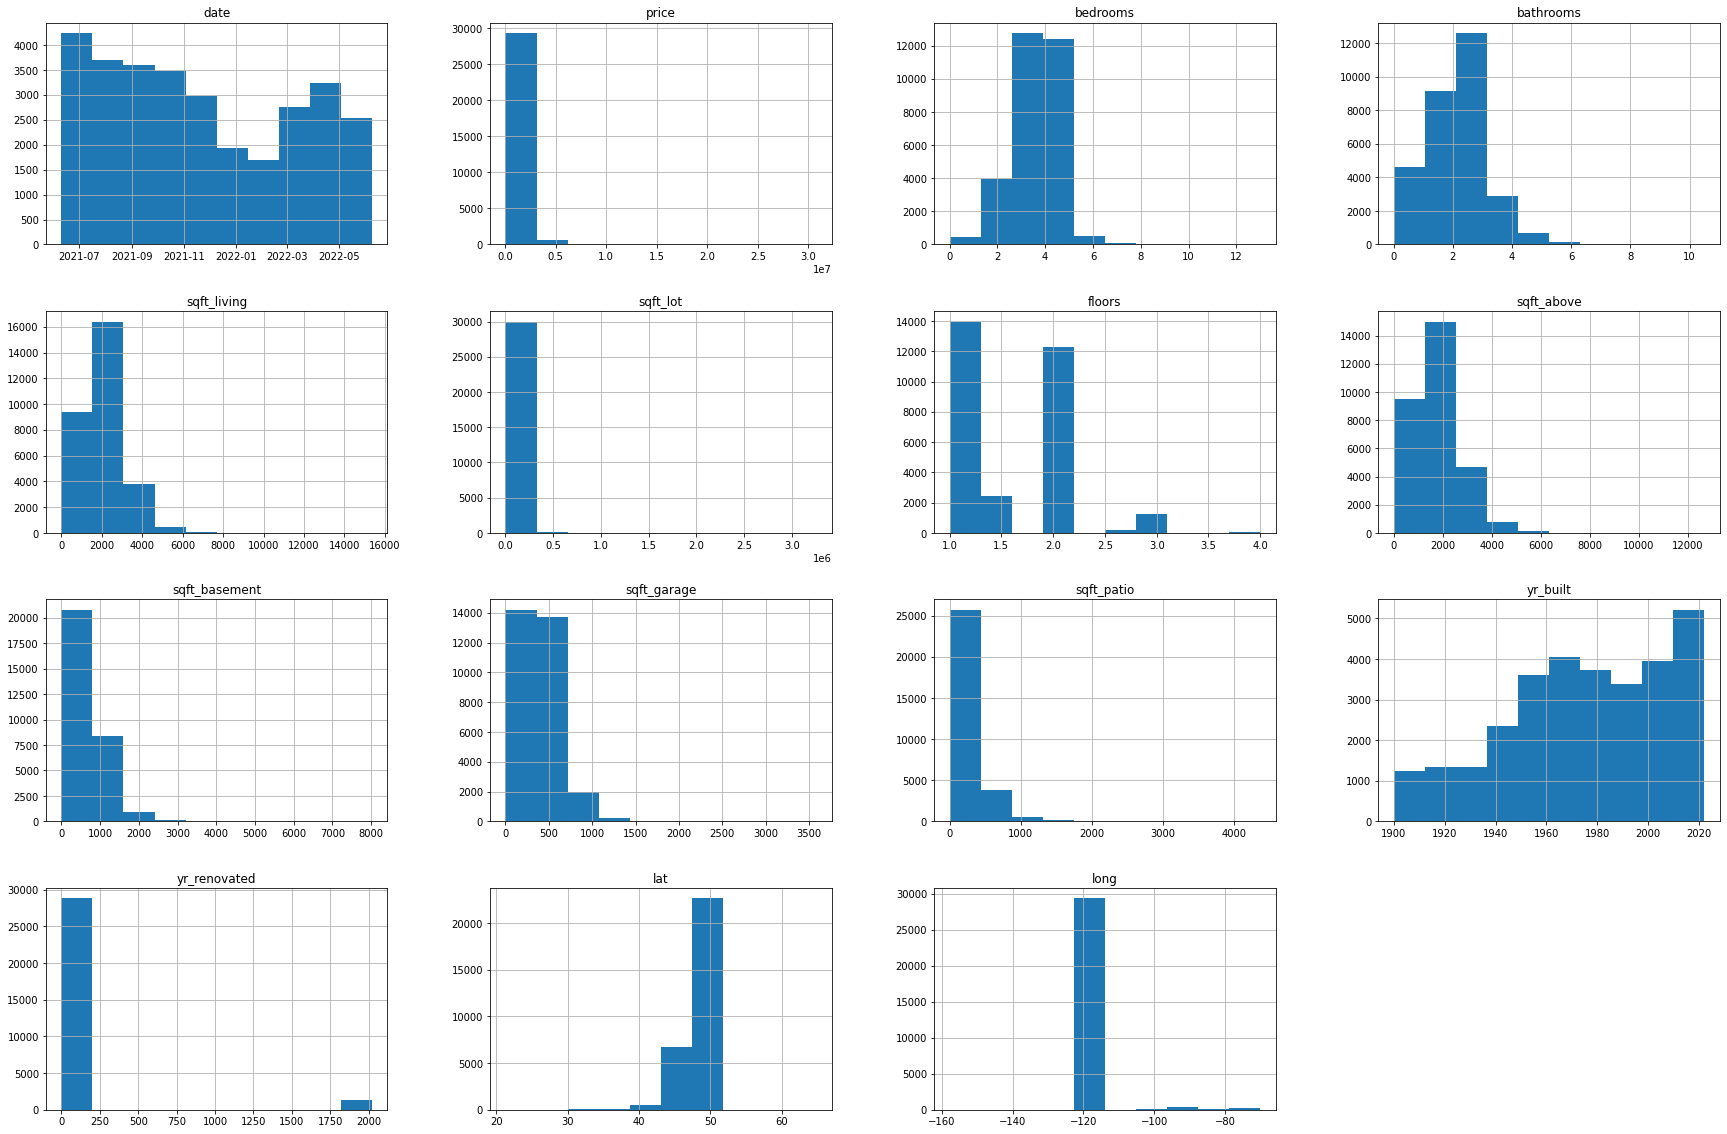

In [373]:
# look at histograms distributions
data.hist(figsize=(30,20));
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_eda.png')

Preliminary observations from looking at histograms
- Most variables have outliers do not follow normal distribution 
- price is leptokurtic and heavily positively skewed with possible outliers
- bedrooms are mostly between 3 and 5 
- most houses have 3 bathrooms
- all sqft because most distributions are positively skewed with possible extreme outliers
- most houses have 1 floor
- most house were built between 2010 and 2020 but construction actually took off just before the 1940's 
- most homes have NOT been renovated given 0 - 200 as the renovated year

### 2.2 Feature Engineering
- Getting age by substracting the year of renovation from year of sale assuming renivation brings the house to a new state, otherwise i substract yoyear of built from year of sale years built

- Total land space by adding living and lot sqft

- Find the relationship with price



2.2.1 Feature Engineering 1


```
# In trying to checking the existence of relationship between the age of a house and the price, 
I create a column age: by subtracting yr_built from date (of sale)
```



In [374]:
# create column age
sale_year = data.date.apply(lambda x: x.year)
data['age'] = np.where(data['yr_renovated'] !=0, sale_year - data['yr_renovated'], sale_year - data['yr_built'])

In [375]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


In [376]:
# check and verify dataty of age column is int.
data['age'].dtype

dtype('int64')

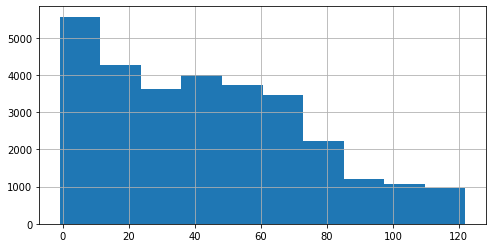

In [377]:
data['age'].hist(figsize=(8,4));
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_age.png')

##### 2.2.1.0 Review relationship between Price and age.



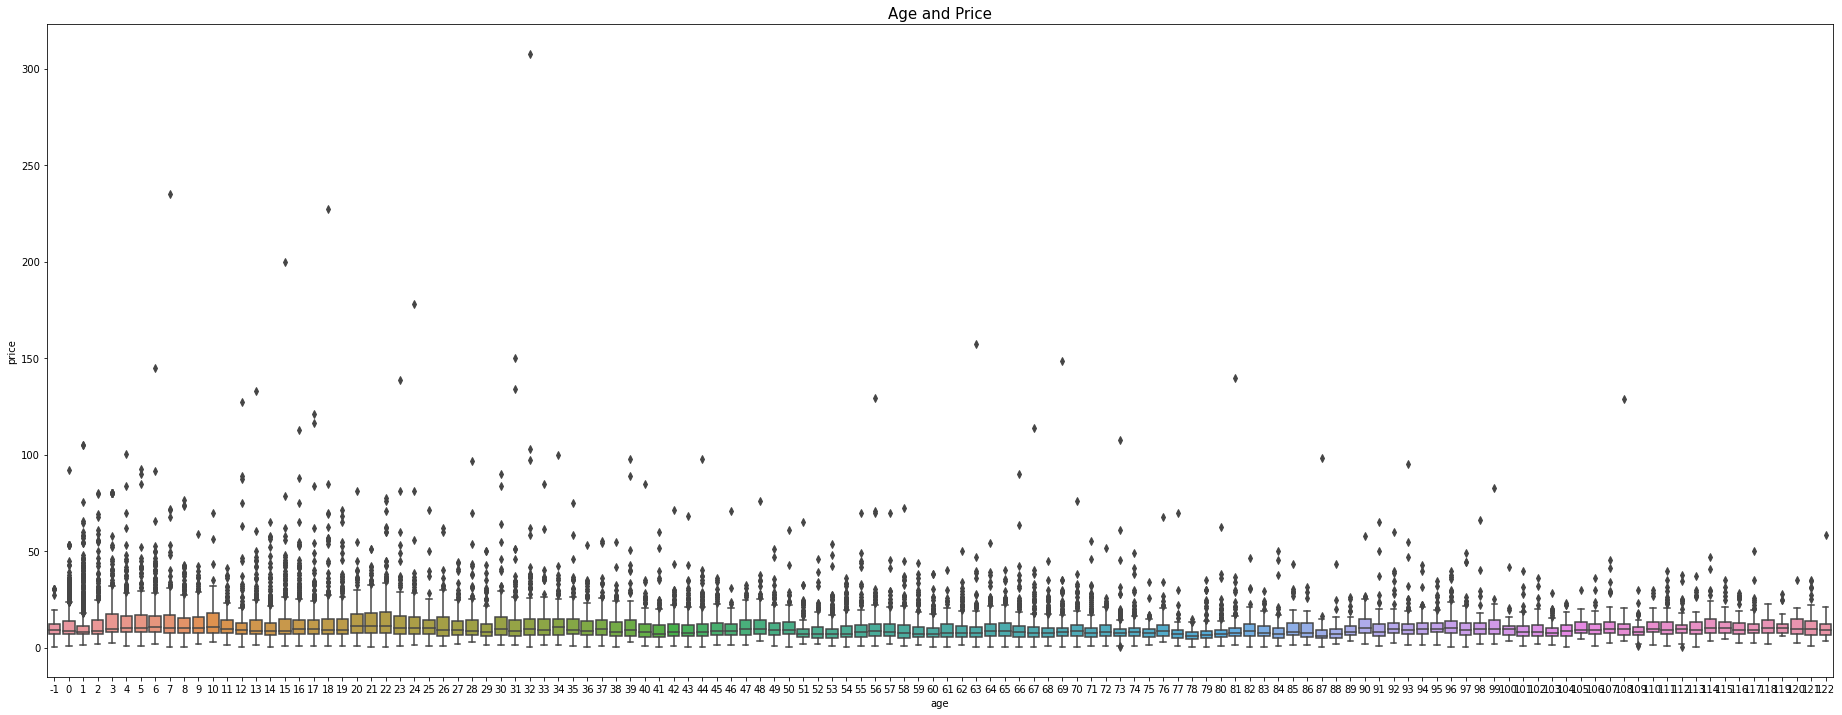

In [378]:
# age vs price
var = 'age'
grade_vs_price = pd.concat([data['price'] / 100_000, data[var]], axis=1)
fig, ax = plt.subplots(figsize=(32,12))
fig = sns.boxplot(x=var, y='price', data=grade_vs_price)
plt.title('Age and Price', fontsize=15, fontname='silom')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/age_vs_price.png')

#plot_cat_vars('age','age_vs_price')



```
# The newer houses tend to have a higher price range as well higher mean prices 
There are houses with negative year, this suggest that either the built year or renovated year is later that year of sale, this is probabably dat entry error.
```



2.2.2 Feature Engineering 2


```
# In trying to checking the existence of relationship between the total land square footage of a house and the price, 
I create a column total_sqft: by adding sqft_living to sqft_lot 
```

In [379]:
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

In [380]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,total_sqft
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,8320
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,9473
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,9036
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,3560
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,1878


In [381]:
# check and verify datatype of total_sqft column is int.
data['total_sqft'].dtype

dtype('int64')

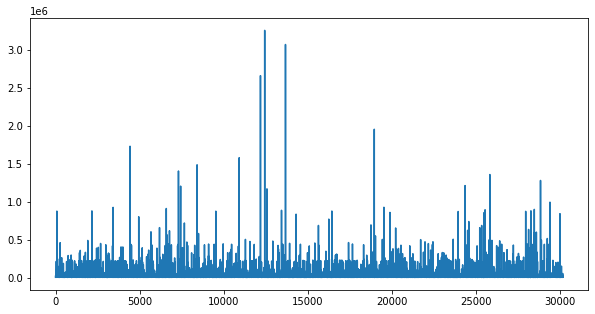

In [382]:
plt.figure(figsize=(10,5))
plt.plot(data['total_sqft'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_totalsqft.png')

##### 2.2.2.0 Review relationship between Total land Sqft and Price.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


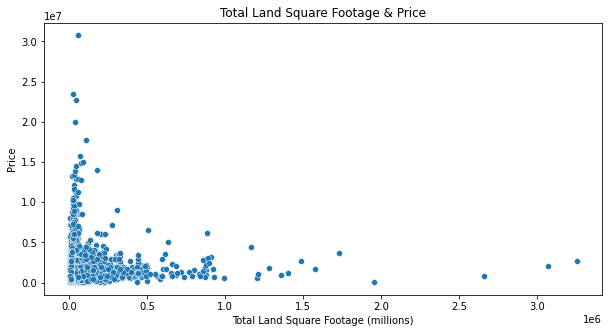

In [383]:
plt.figure(figsize=(10,5))
plt.title('Total Land Square Footage & Price')
plt.xlabel('Total Land Square Footage (millions)')
plt.ylabel('Price')
sns.scatterplot(data['total_sqft'],data['price'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/totalsqft_vs_price.png');

In [384]:
#plt.figure(figsize=(10,5))
#sns.distplot(data['total_sqft'],bins=100)
#plt.show()

## 3.0 Modeling

### 3.1 Baseline Model
```
# Build a model that does not include the categorical variables as well as without much preparation of the data as the baseline model
```

```
`#Lat and long are of no relevance because they are not usual factors to consider when purchasing houses `
```

In [385]:
preds_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','sqft_above','sqft_basement','sqft_garage', 'sqft_patio','yr_built', 'yr_renovated','age', 'total_sqft']
#preds_cols

In [386]:
# features = data[preds_cols]
# features.sample(10)

In [387]:
# target = data['price']
# target.head()

In [388]:
# y = target
# X = features

y = data['price']
X = data[preds_cols]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [389]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1772.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        06:40:05   Log-Likelihood:            -4.4805e+05
No. Observations:               30155   AIC:                         8.961e+05
Df Residuals:                   30142   BIC:                         8.962e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.415e+06   1.56e+06     -3.470

#### Interpretation
- Our model is responsible for 41% in price variability
- Model is good overall because the p-value less that 0.05
- Some of the Coefficients:
  - Constant...
  - For every 1 increase in bedroom, we have `13,000 USD` decrease in prices
  - For every 1 increase in bathroom, we have `1,273 USD `increase in prices
  - For every sqft increase in sqft_living, we have 263.13 USD increase in 
  prices
  - For every sqft increase in total land space (total_sqft), we have `131.51 USD` increase in prices

Evaluating Mean Absolute Error & Root Mean Square Error

In [390]:
#Define function for linear regression
# use fitted model to generate predictions for 
def lin_reg(X, y):
    linreg = LinearRegression()  
    linreg.fit(X, y)
    y_hat = linreg.predict(X)
    print('R_squared Score:', linreg.score(X, y))
    print('Mean Absolute Error:', mae(y, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mse(y, y_hat)))
    print('Mean Predicted Selling Price:', y_hat.mean())
    print('Mean Selling Price:', y.mean())
    return linreg
lin_reg(X,y)

R_squared Score: 0.4136247911223827
Mean Absolute Error: 380942.08745233604
Root Mean Squared Error test: 686397.1933649512
Mean Predicted Selling Price: 1108535.837871
Mean Selling Price: 1108535.837871


LinearRegression()

## 4.0 Data Preparation for Model Iteration

### 4.1 Checking the probability density function for numeric variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


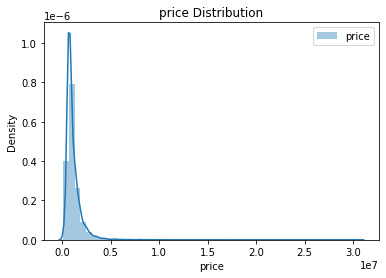

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


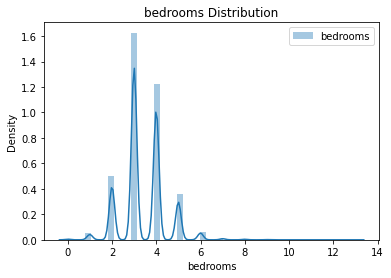

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


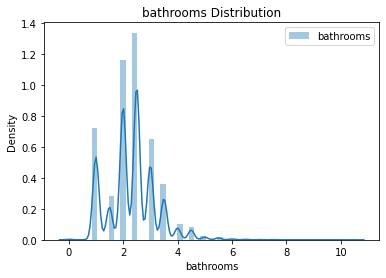

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


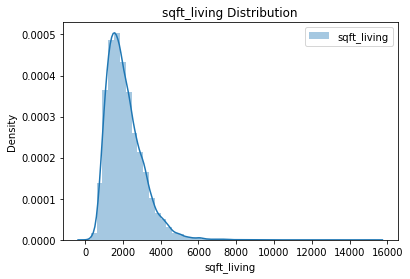

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


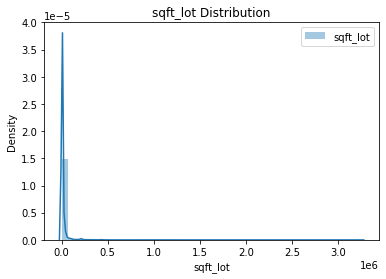

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


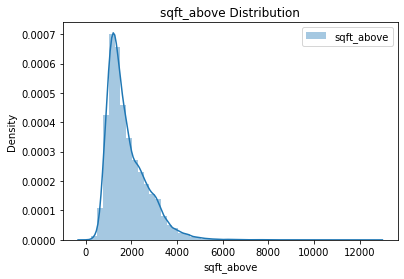

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


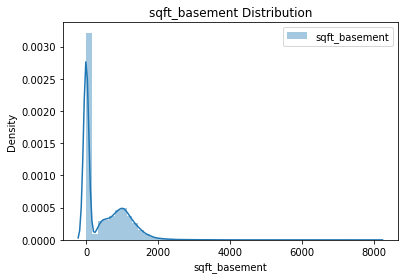

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


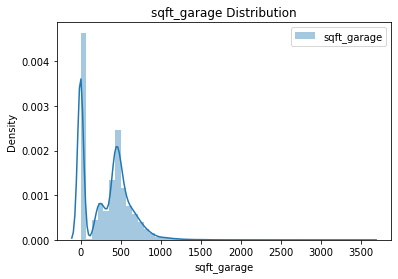

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


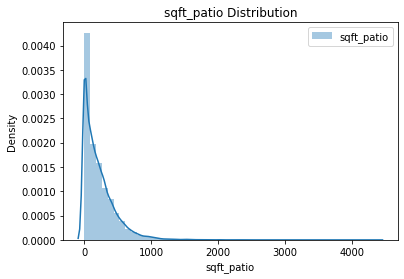

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


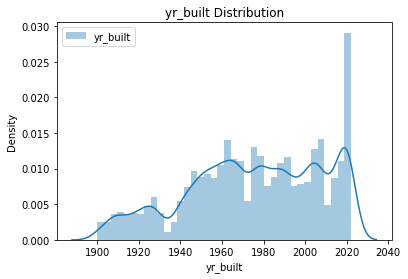

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


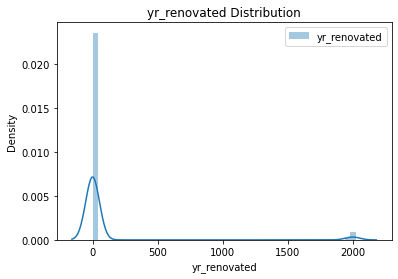

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


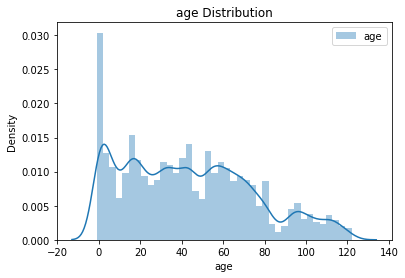

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


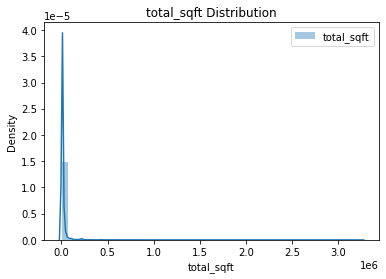

In [391]:
# #kernel density functions
cont_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated','age', 'total_sqft']
def plot_histkde(data, columns):
    for column in columns:
        sns.distplot(data[column], label=column)
        plt.title (column + ' Distribution')
        plt.legend()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/k_density_'+column+'.png')
        plt.show();
plot_histkde(data, cont_var);

Observations
- The distributions show heavy positive skeweness.
- Some distributions appear to be multimodal.

### 4.2 Identifying Outliers

In [392]:
# look at value_counts to identfy any outliers
for col in data.columns:
    print('\n')
    print(col, data[col].value_counts())



date 2021-07-01    196
2021-08-02    186
2021-06-23    176
2021-07-06    176
2021-06-16    174
             ... 
2022-06-09      1
2022-01-16      1
2021-12-25      1
2021-12-05      1
2021-12-26      1
Name: date, Length: 365, dtype: int64


price 650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
728350.0       1
344000.0       1
1211500.0      1
2346000.0      1
656500.0       1
Name: price, Length: 5202, dtype: int64


bedrooms 3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64


bathrooms 2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2266
1.5     1808
4.0      645
4.5      533
5.0      145
5.5      104
6.0       45
0.0       31
6.5       25
7.0       12
7.5       12
0.5        5
9.5        2
8.0        2
10.5       1
10.0       1
8.5        1
Name: bathrooms, dtype: int64


sqft_livi

- In dealing with outliers, I will focuse on two variables **bedroom** and **bathroom** because outliers in these variables such as for instance a 13-bedroom or 10-bathroom home is probably a much more larger property that would be best analyzed separate from single-family homes of between 1 to 5 bedroom and 1 to 5 bathrooms which form the majority of the dataset.

- Hence, I'll use the 1.5 IQR rule and descriptve statistics of the columns to determine and remove the outliers

- IQR stands for Inter-Quartile Rang also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q₃ − Q₁. *Source: Wikipedia*

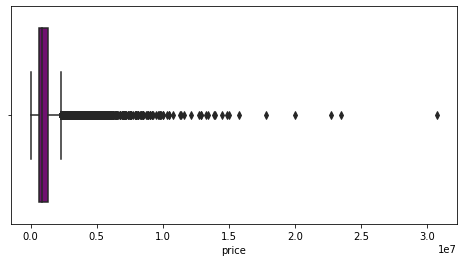

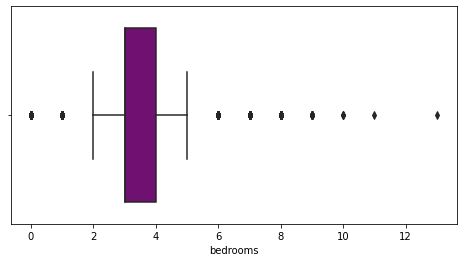

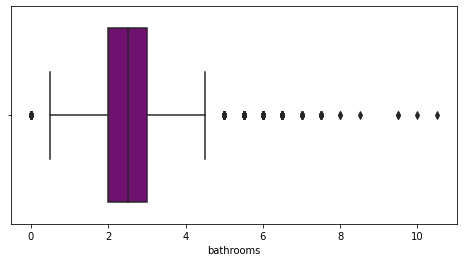

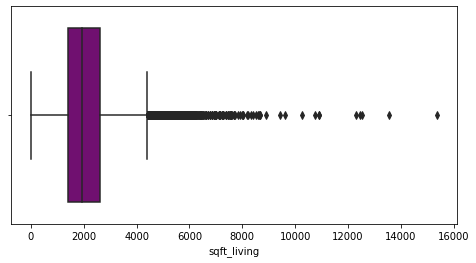

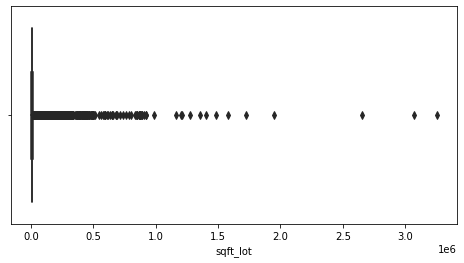

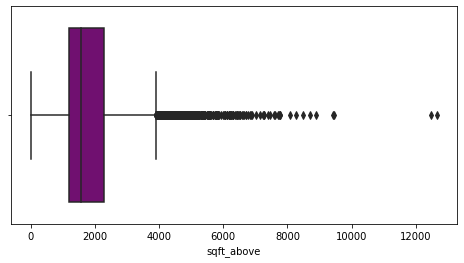

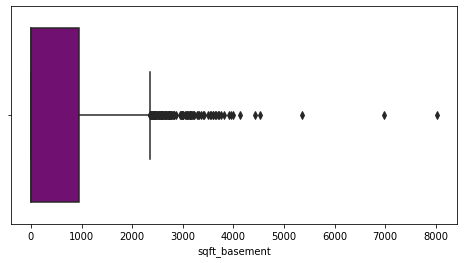

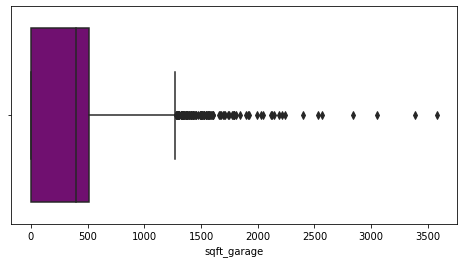

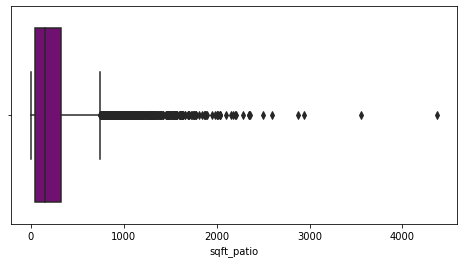

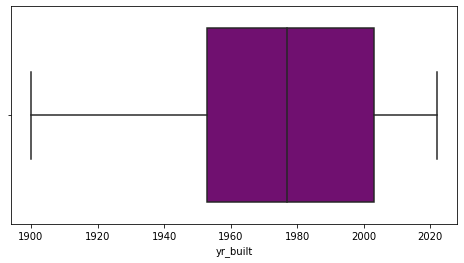

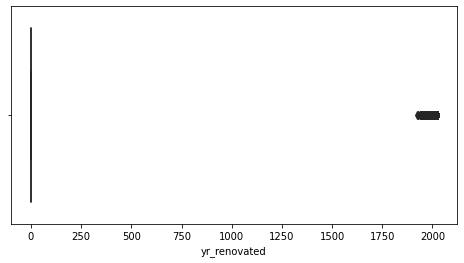

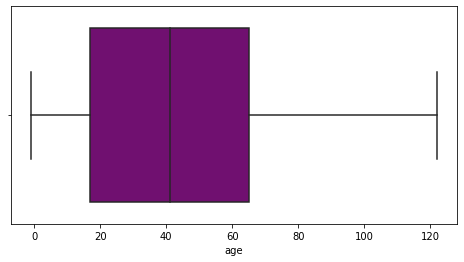

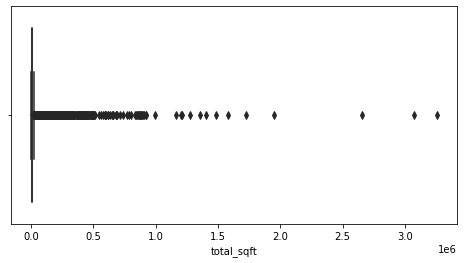

In [393]:
#Visualising numeric variables
cont_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated','age', 'total_sqft']
def outlier_viz(columns):
    for column in columns:
      fig = plt.figure(figsize=(8,4))    
      sns.boxplot(x=data[column], color='purple')
      plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+column+'_outlier.png')
outlier_viz(cont_var);

In [394]:
#visualising bedrooms spread

# fig = plt.figure(figsize=(8,4))
# sns.boxplot(x=data['bedrooms'])
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bedroom_outlier.png')

# def outlier_viz(x):
#   fig = plt.figure(figsize=(8,4))
#   sns.boxplot(x=data[x])
#   plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+x+'_outlier.png')

In [395]:
#outlier_viz('bedrooms')

In [396]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'age', 'total_sqft'],
      dtype='object')

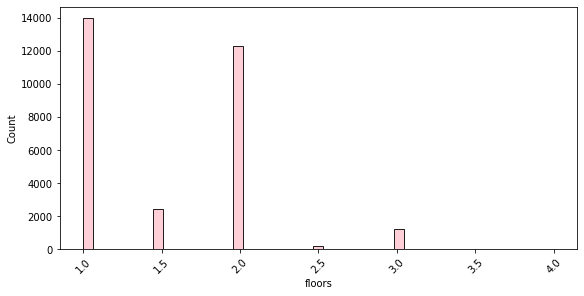

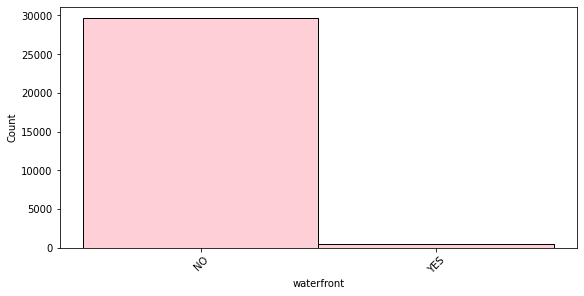

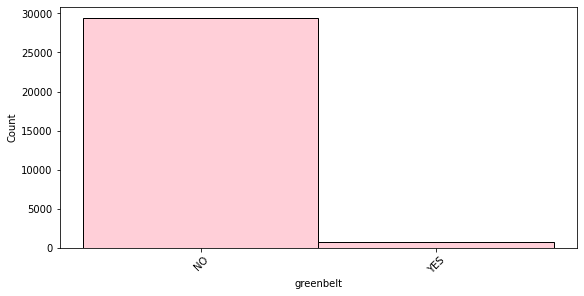

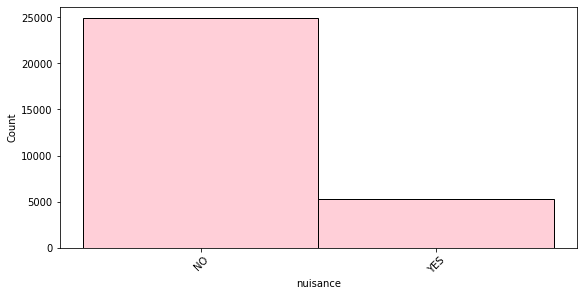

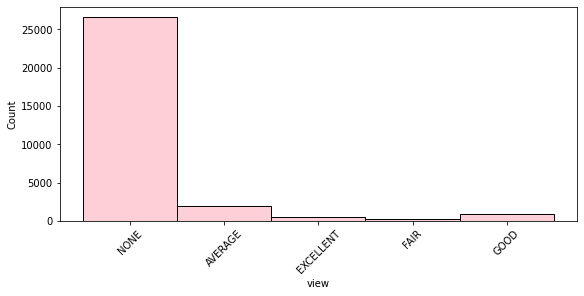

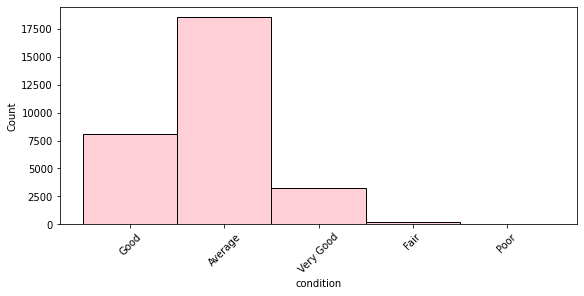

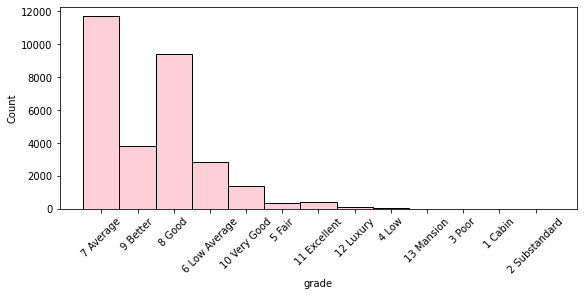

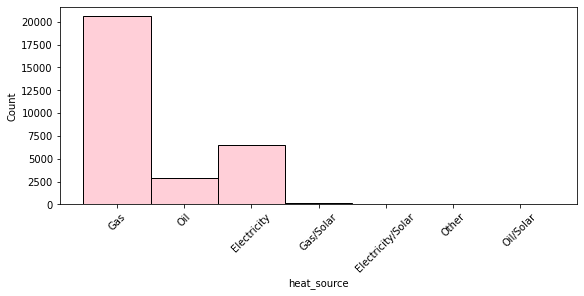

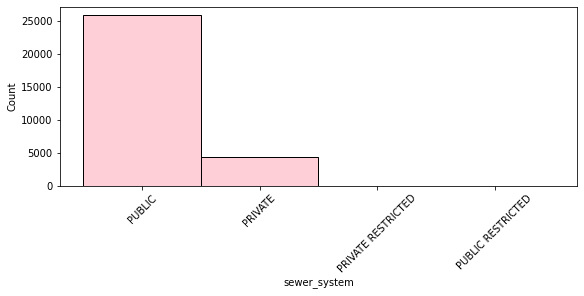

In [397]:
#Visualising categorical variables
cat_var = ['floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition','grade', 'heat_source', 'sewer_system']
def cat_outlier_viz(columns):
  for column in columns:
    #fig = plt.figure(figsize=(20,8))
    fig = plt.figure(constrained_layout=True, figsize=(8,4))
    sns.histplot(data=data, x=data[column], color="pink")
    plt.xticks(rotation=45)
    # sns.catplot(data=data, x=data[column], kind="count", palette="ch:.25")
      # data[column].hist(figsize=(50,30));
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+column+'cat_outlier.png')
cat_outlier_viz(cat_var)

#### 4.2.1 Dealing with Outliers

In [398]:
#Make a copy of dataset
#Create new dataframe for transformations
data_clean = data.copy()

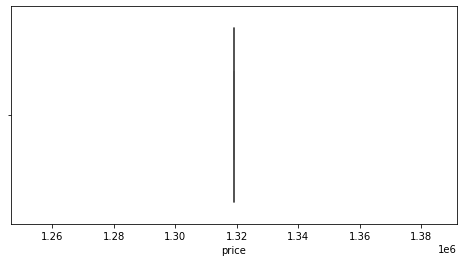

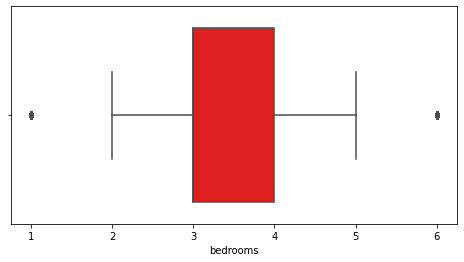

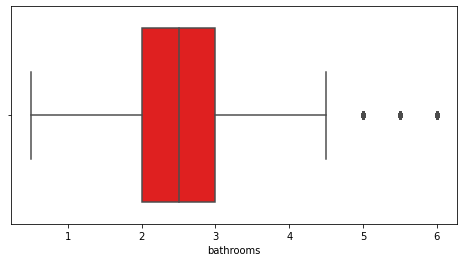

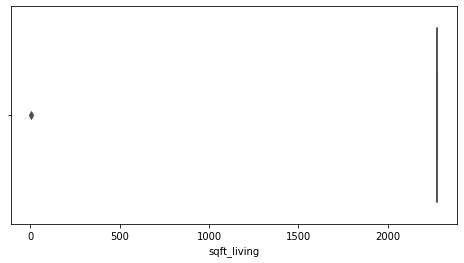

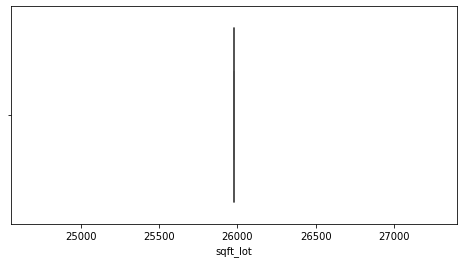

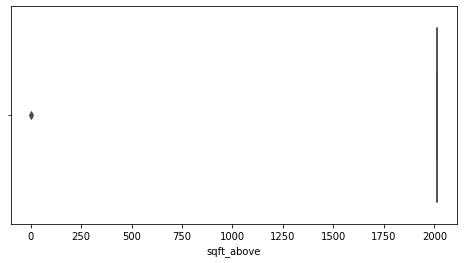

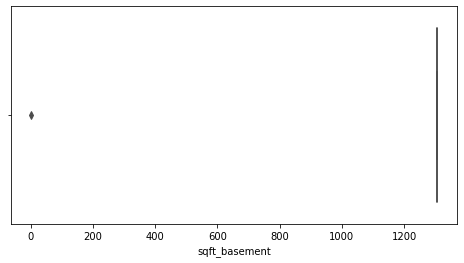

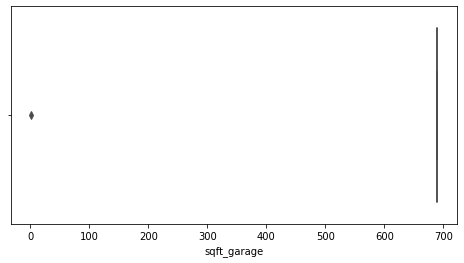

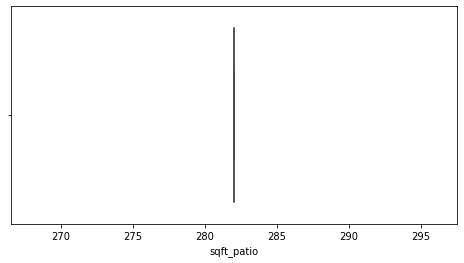

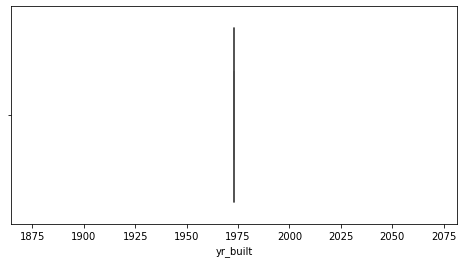

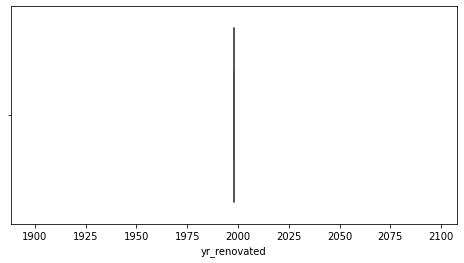

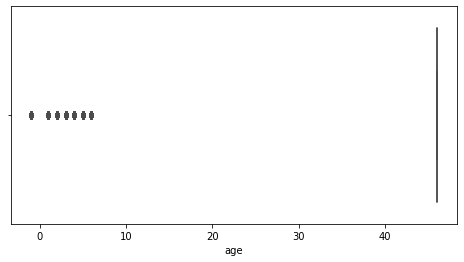

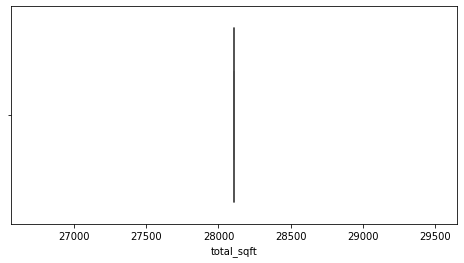

In [399]:
# Detecting bedrooms outliers using IQR rule
# Q1 = data['bedrooms'].quantile(0.25)
# Q3 = data['bedrooms'].quantile(0.75)
# IQR = Q3 - Q1
# print("The Inter-quartile range for bedrooms spread is " + str(IQR))
# print("lower limit of bedrooms spread is " + str(Q1 - 1.5 * IQR))
# print("Upper limit of bedrooms spread is " + str(Q3 + 1.5 * IQR  ))

def outlier_iqr(columns):
  for column in columns:
    Q1 = data_clean[column].quantile(0.25)
    Q3 = data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    mean_outliers = data_clean.loc[(data_clean[column] > Q3) | (data_clean[column] < Q1), column].mean()
    round(mean_outliers,0)
    data_clean[column] = np.where((data_clean[column] > 6 ) | (data_clean[column] == 0), round(mean_outliers), data_clean[column])
    fig = plt.figure(figsize=(8,4))    
    sns.boxplot(x=data_clean[column], color="red")
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+column+'_outlier_fixed.png')
    #print('The Inter-quartile range for '+column+' spread is' + str(IQR))
outlier_iqr(cont_var);

In [400]:
# outlier_iqr('bedrooms')

As shown above, I take the range of bedrooms to be between 1 and 6

In [401]:
# get descriptive statistics of bedrooms column
data['bedrooms'].describe()

count    30155.000000
mean         3.413530
std          0.981612
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

In [402]:
data_clean['bedrooms'].describe()

count    30155.000000
mean         3.396916
std          0.928932
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64

In [403]:
# get the mean of bedrooms without homes with more than 6  and 0 bedrooms
# mean_bed_no_outliers = data.loc[(data['bedrooms'] > 6) | (data['bedrooms'] != 0), 'bedrooms'].mean()
# round(mean_bed_no_outliers,0)

In [404]:
# replace greater tha 6 and 0 with mean_bed_no_outliers
# data['bedrooms'] = np.where((data['bedrooms'] > 6 ) | (data['bedrooms'] == 0), round(mean_bed_no_outliers), data['bedrooms'])

In [405]:
# recheck the descriptive statistics of bedrooms column
# data['bedrooms'].describe()

In [406]:
# Visualising bedroom spread after outlier treatment 
# fig = plt.figure(figsize=(8,4))
# sns.boxplot(x=data['bedrooms'])
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bedroom_outlier_2.png')

In [407]:
#visualising bathrooms spread
# fig = plt.figure(figsize=(8,4))
# sns.boxplot(x=data['bathrooms'])
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bathroom_outlier.png')

In [408]:
# Detecting bathrooms outliers using IQR rule
# Q1 = data['bathrooms'].quantile(0.25)
# Q3 = data['bathrooms'].quantile(0.75)
# IQR = Q3 - Q1
# print("The Inter-quartile range for bathrooms spread is " + str(IQR))
# print("Lower limit of bathrooms spread is " + str(Q1 - 1.5 * IQR))
# print("Upper limit of bathrooms spread is " + str(Q3 + 1.5 * IQR  ))

As shown above, I take the range of bedrooms to be between 1 and 5

In [409]:
# # get descriptive statistics of bedrooms column
# data['bedrooms'].describe()

In [410]:
# get the mean of bedrooms without homes with more than 5  bathrooms
# mean_bath_no_outliers = data.loc[(data['bathrooms'] < 6), 'bathrooms'].mean()
# round(mean_bath_no_outliers,0)

In [411]:
# replace greater than 5 bathrooms with mean_bath_no_outliers
# data['bathrooms'] = np.where((data['bathrooms'] > 5 ), round(mean_bath_no_outliers), data['bathrooms'])

In [412]:
# recheck the descriptive statistics of bathrooms column
# data['bathrooms'].describe()

In [413]:
# Visualising bathrooms spread after outlier treament
# fig = plt.figure(figsize=(8,4))
# sns.boxplot(x=data['bathrooms'])
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bathroom_outlier_2.png')

### 4.3 Apply log transformation for positively skewed data


```
# At this point and before any transformations, I will proceed to save my new partially preprocessed and clean dataset. 
This will enable me to come back to the raw data in case it is needed later on.
```



In [414]:
#Save partially clean copy of the dataframe to file
data_clean.to_csv('KingsCounty_Clean.csv')
#Create new dataframe for transformations
data_trans = data_clean.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


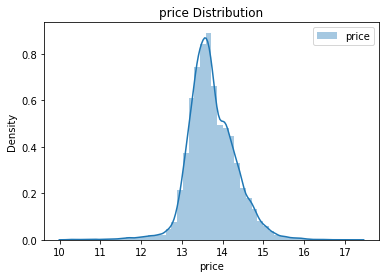

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


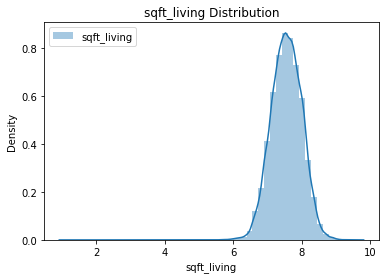

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


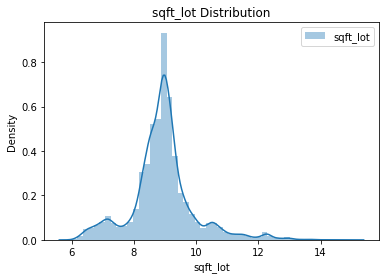

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


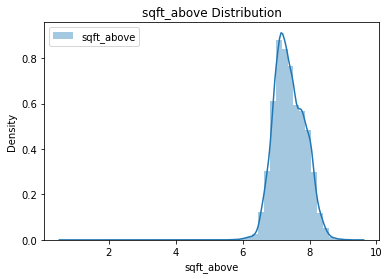

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


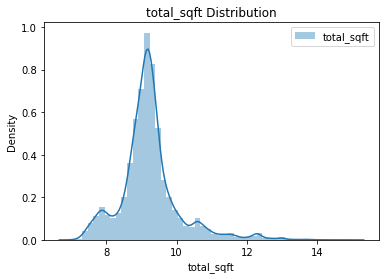

In [415]:
#Not including long, since it has negative values.
trans_log = ['price','sqft_living','sqft_lot','sqft_above','total_sqft']
for col in trans_log:
    data_trans[col]=np.log(data[col])
plot_histkde(data_trans, trans_log)

### 4.4 Check for multicolinearity

In [416]:
# generate copy of data without target variable (price), date, address and lat/lon to perform multicolinearity check
data_pred = data_trans.drop(['date', 'price', 'address', 'lat', 'long'], axis=1)
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,age,total_sqft
0,4,1.0,7.073270,8.873468,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,7.073270,1305,689,282,1973,1998,46,9.026418
1,5,2.5,7.926603,8.810310,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,7.358831,1305,689,282,1973,1998,46,9.156201
2,6,2.0,7.965546,8.725182,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,7.365180,1305,689,282,1973,1998,46,9.108972
3,3,3.0,7.677864,7.244228,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,6.993933,1305,689,282,1973,1998,46,8.177516
4,2,2.0,7.021084,6.630683,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,7.021084,1305,689,282,1973,1998,46,7.537963


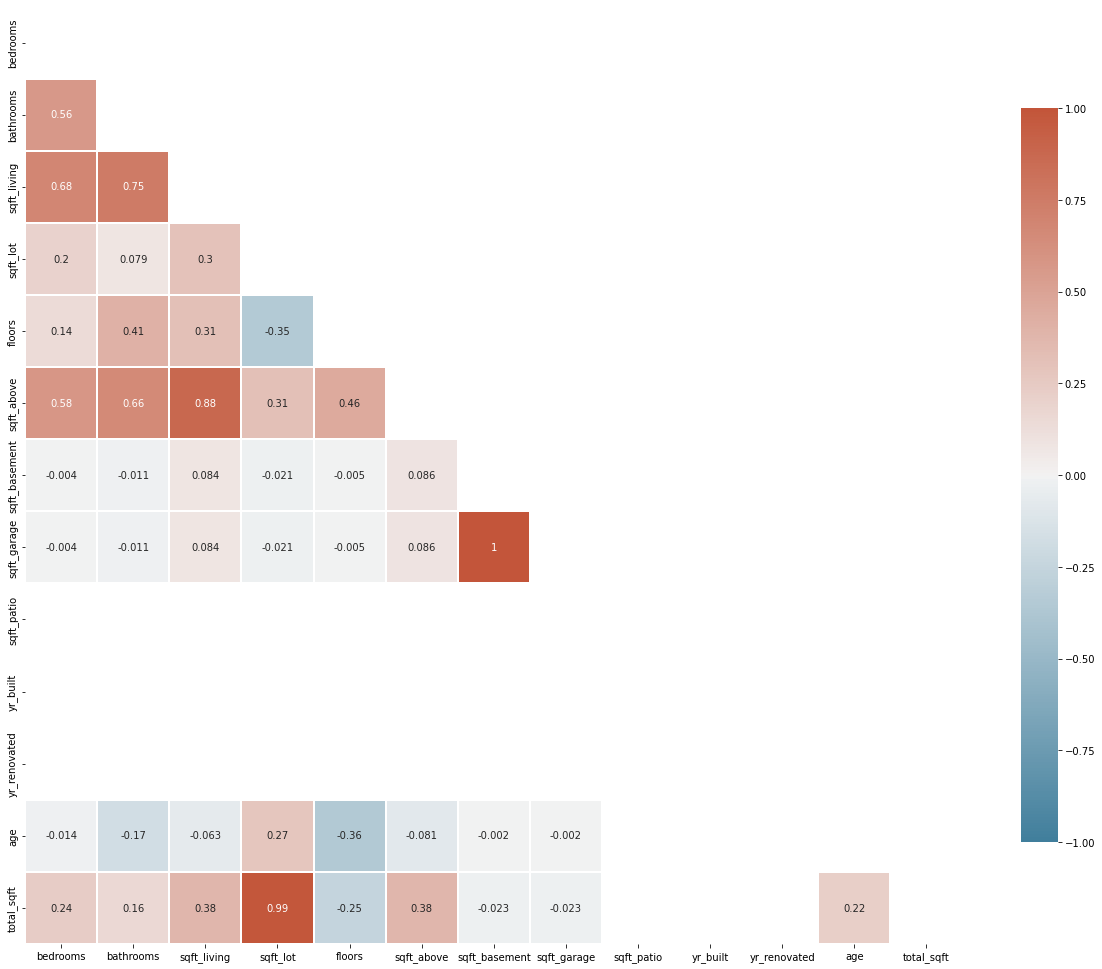

In [417]:
# check for multicolinearity with seaborn heatmap
# compute the correlation matrix
corr = round(data_pred.corr(), 3)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(21, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/multicolin_heatmap.png')

- Using .75 as a cutoff, there is high correlation between sqft_living and sqft_above as a result will probably only retain one of these.

##### 4.4.1 Visually verifying check for multicollinearity

In [418]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [419]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

,cc
pairs,
"(total_sqft, sqft_lot)",0.988284
"(sqft_living, sqft_above)",0.875314
"(bathrooms, sqft_living)",0.754407


Based on the multicollinearity checks, I have decided to work with `total_sqft`, `age` and `sqft_living` in lieu of `sqft_lot`, `yr_built` and `sqft_above` respectively.

### 4.5 Dealing with categorical variables

In [420]:
# converting categorical variables to category type
cat_vars = ['bedrooms','bathrooms','floors','waterfront','greenbelt', 'nuisance', 'view','condition','grade','heat_source', 'sewer_system']

for column in data[cat_vars]:
    data_trans[cat_vars ] = data_trans[cat_vars ].astype('category') 

#### 4.5.1 Review relationship between Price and the categorical variables to guide the decision on which to include in the model.

In [421]:
#define a function to plot outputs
def plot_cat_vars(cat, var_dat):
  var = str(cat)
  var_dat = pd.concat([data['price'] / 100_000, data[var]], axis=1)
  fig, ax = plt.subplots(figsize=(8,4))
  fig = sns.boxplot(x=var, y='price', data=var_dat)
  plt.title(var.title() + ' and Price', fontsize=15, fontname='silom')
  plt.xticks(rotation=45)
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+var+'_vs_price.png')

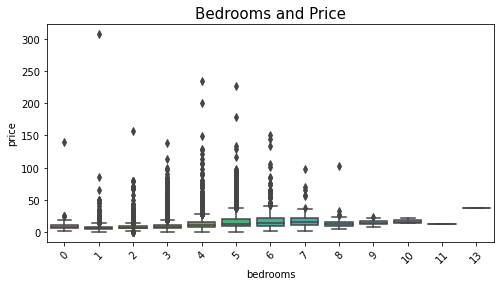

In [422]:
plot_cat_vars('bedrooms','bed_vs_price')



```
# Number of bedrooms seem to have a direct correlation to price, once it hits 6, it seems to taper off.
```



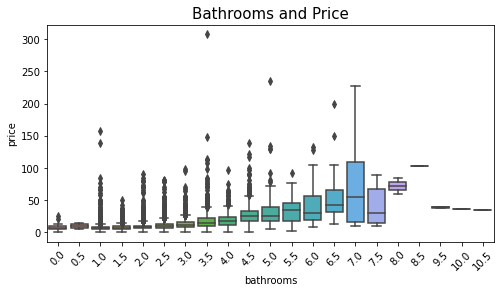

In [423]:
plot_cat_vars('bathrooms','bath_vs_price')



```
# Number of bathrooms seem to have a direct correlation to price as well, steadily climbs as number goes up.
```



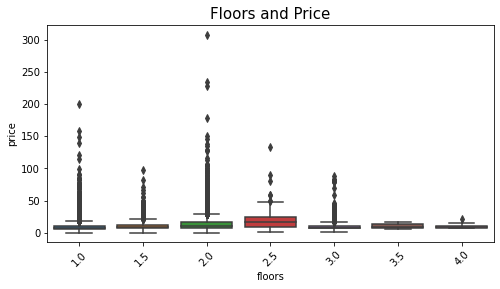

In [424]:
plot_cat_vars('floors','floor_vs_price')



```
# Price stability right around and after 2.5 floors which could mean 1st, 2nd floor and basement
```



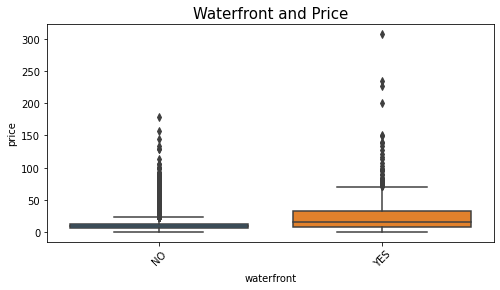

In [425]:
plot_cat_vars('waterfront','waterfront_vs_price')



```
# Waterfront house expetedly have a higher mean price
```



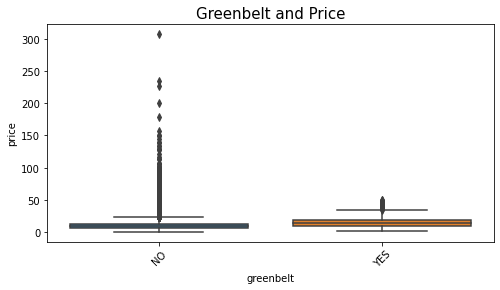

In [426]:
plot_cat_vars('greenbelt','greenbelt_vs_price')



```
# Although not a lot of houses are adjascent to a greenbelt, those that are have slightly higher mean price
```



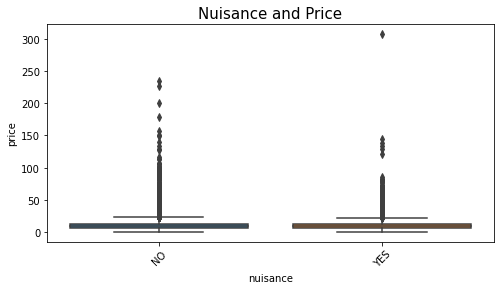

In [427]:
plot_cat_vars('nuisance','nuisance_vs_price')



```
# No nuisance indicates higher price
```



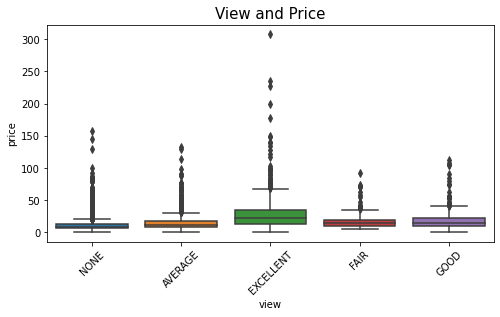

In [428]:
plot_cat_vars('view','view_vs_price')



```
# Although excellent view indicates higher price, however there are still some higher priced homes with 0 view, 
further analysis might required to consider that column as part of the model.
```



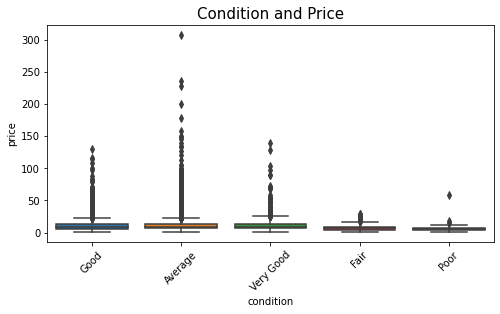

In [429]:
plot_cat_vars('condition','condition_vs_price')



```
# Average, Good and Very good condition have higher prices as expected
```



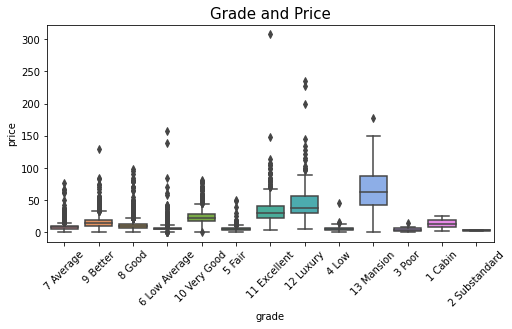

In [430]:
# grade vs price
plot_cat_vars('grade','condition_vs_price')



```
# As grades increases, mean price seems to increase as well
```



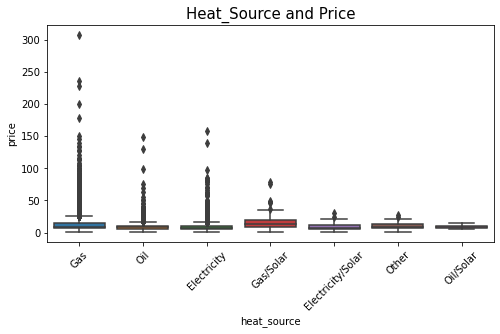

In [431]:
plot_cat_vars('heat_source','heat_source_vs_price')



```
# More houses have Gas as the heat source and also indicates higher prices, Gas/Solar combinationhowever has higher mean price
```



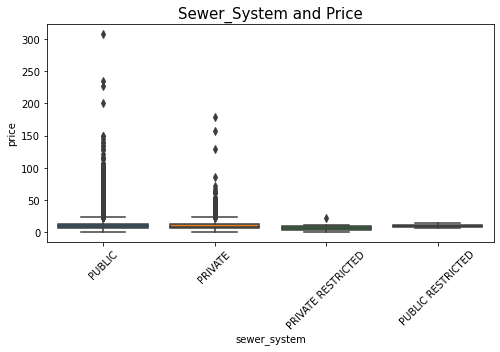

In [432]:
plot_cat_vars('sewer_system','sewer_system_vs_price')





```
# Public sewer system is dominant and comes with high prices.
```





## 4.6 One-Hot Encoding


In [433]:
# create dummy variable for categorical features
#cat_list_2 = ['bedrooms', 'bathrooms', 'grade']
cat_list_2 = ['bedrooms','bathrooms','floors','waterfront','greenbelt', 'nuisance', 'view','condition','grade','heat_source', 'sewer_system']
dummies = pd.get_dummies(data_trans[cat_list_2], prefix=cat_list_2, drop_first=True) #drop a column to avoid dummy variable trap

data_preprocessed = data_trans.drop(cat_list_2, axis=1)

data_preprocessed = pd.concat([data_preprocessed, dummies], axis=1)

data_preprocessed.head(2)

,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,total_sqft,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,2022-05-24,13.422468,7.073270,8.873468,7.073270,1305,689,282,1973,1998,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,46,9.026418,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2021-12-13,13.732129,7.926603,8.810310,7.358831,1305,689,282,1973,1998,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,46,9.156201,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


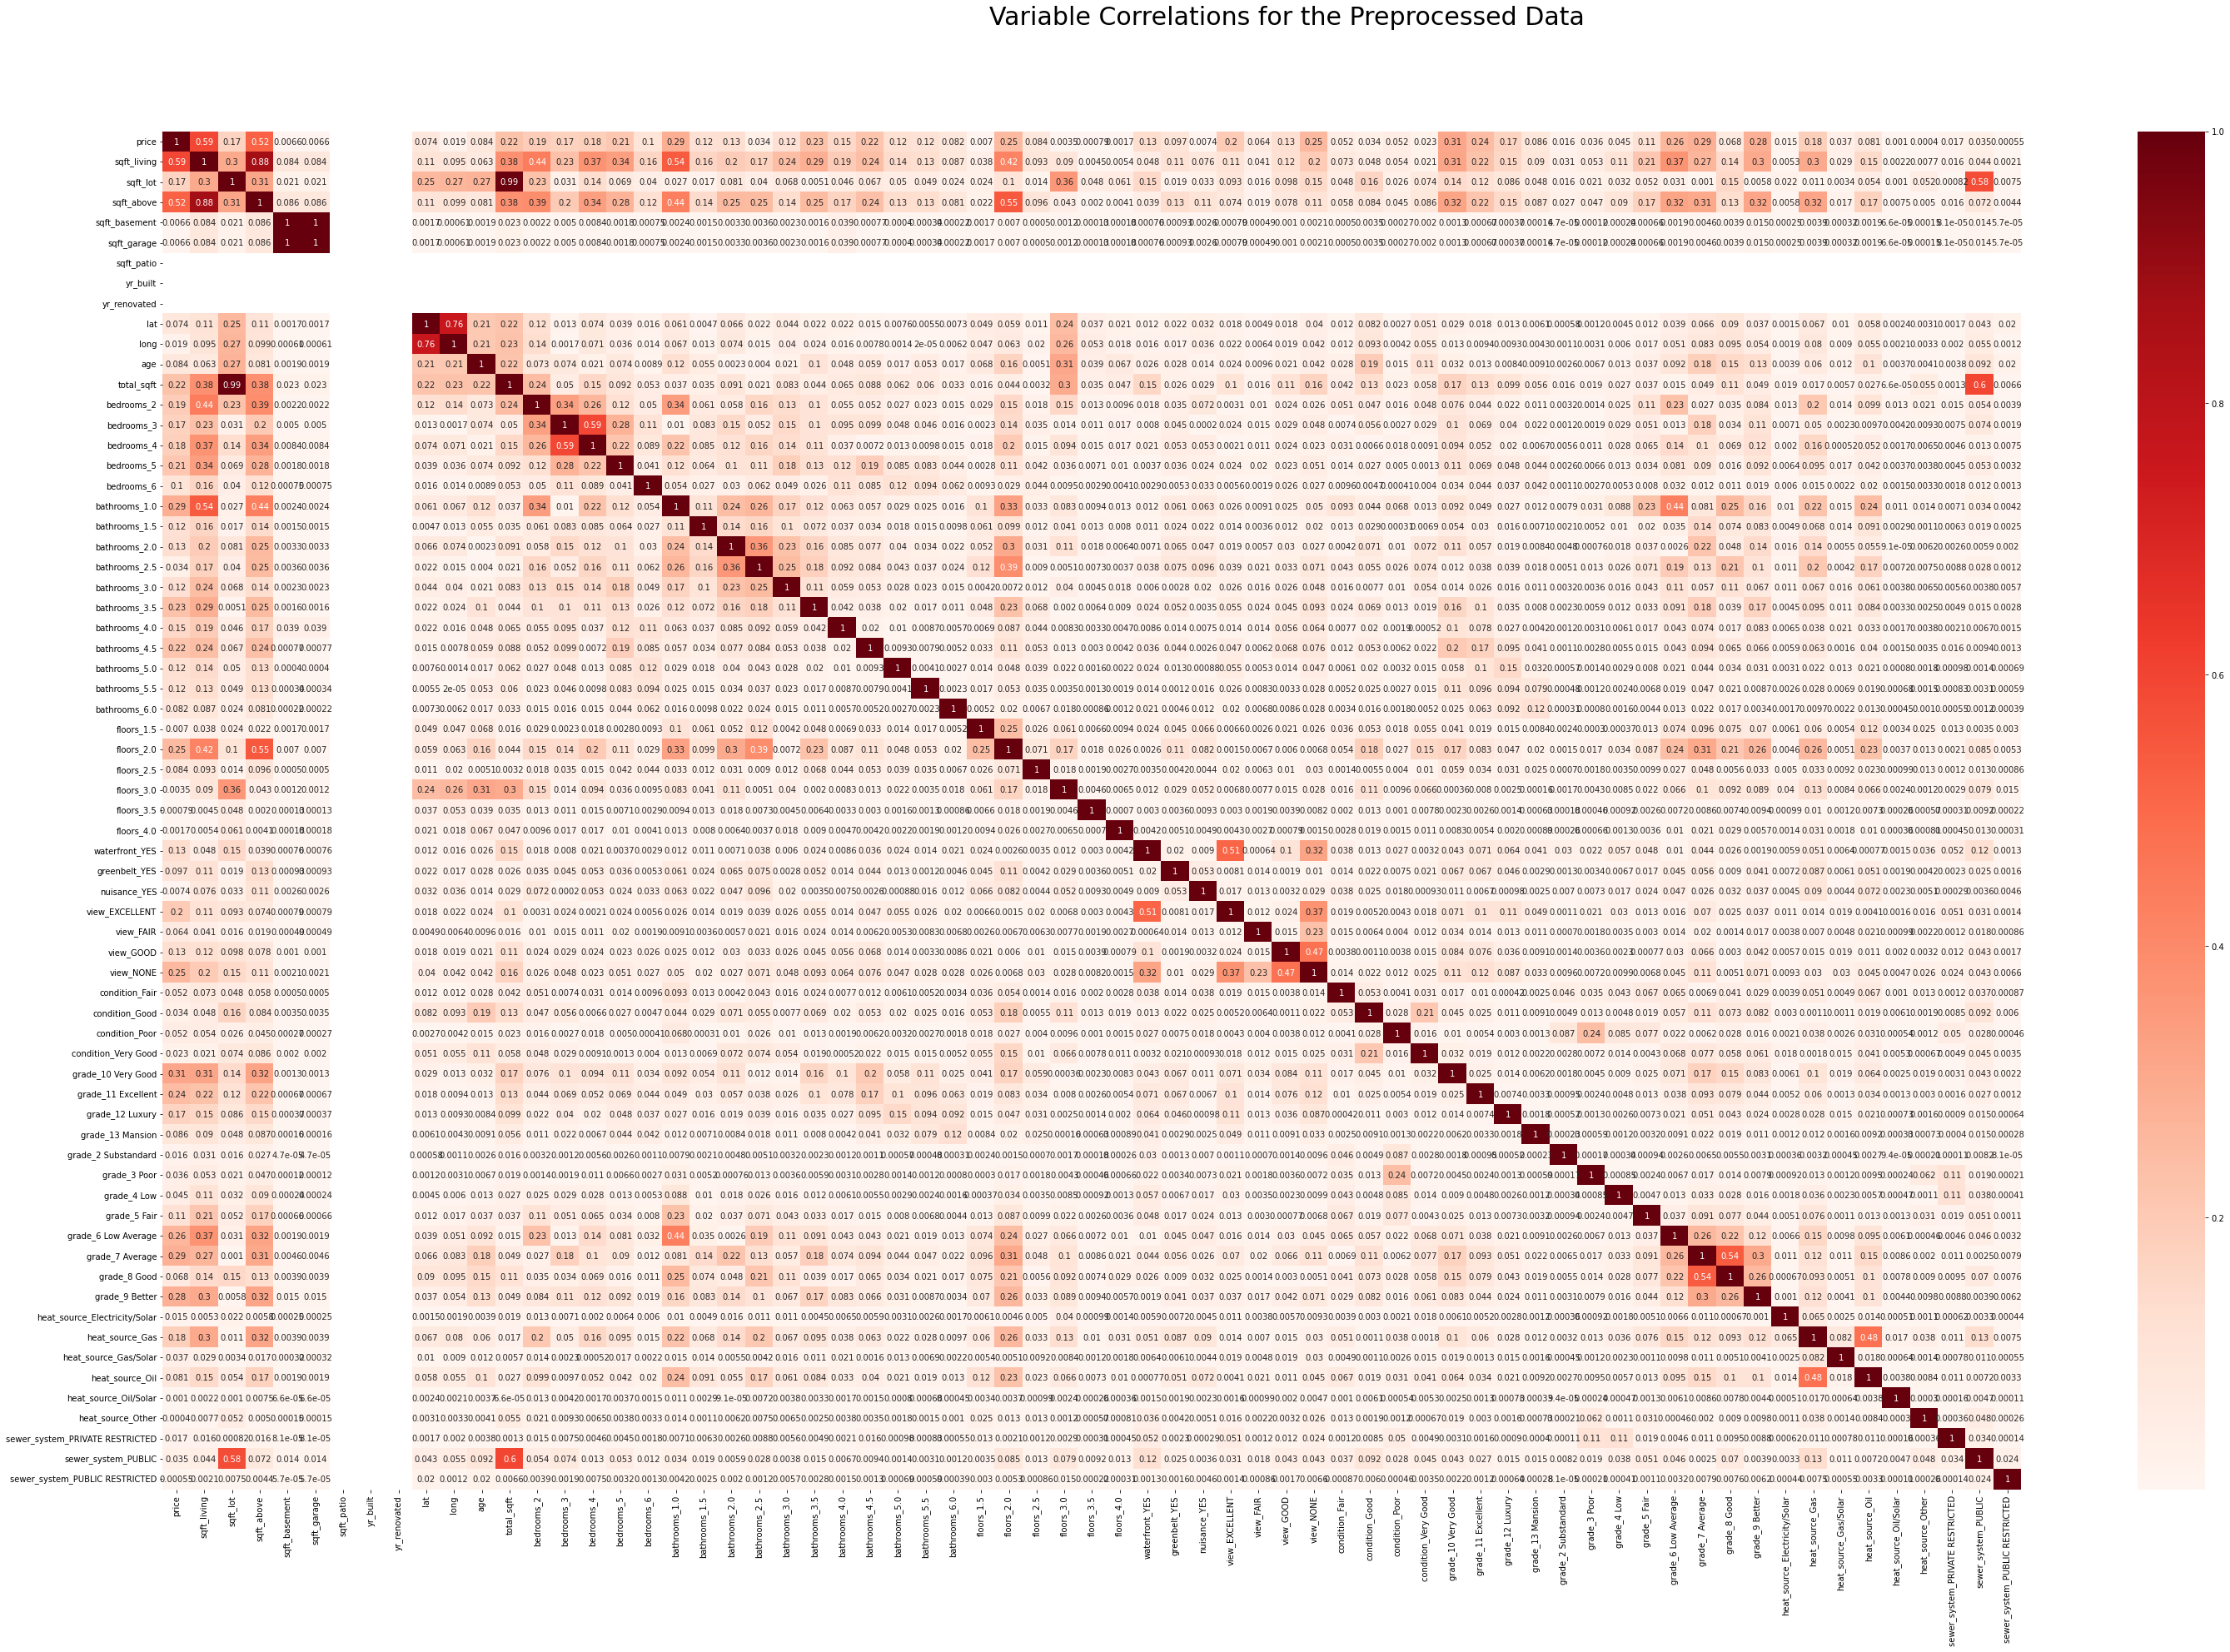

In [434]:
corr = data_preprocessed.corr().abs()
fig, ax=plt.subplots(figsize=(50,30))
fig.suptitle('Variable Correlations for the Preprocessed Data', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/data_prep_corr.png')

Checking multicolinarity after Hot Encoding

In [435]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = data_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [436]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

,cc
pairs,
"(total_sqft, sqft_lot)",0.988284
"(sqft_above, sqft_living)",0.875314
"(long, lat)",0.760766


## 4.7 Continous Variables Preparation
Its time to review the continous variable relative to price in preparation for modlelling

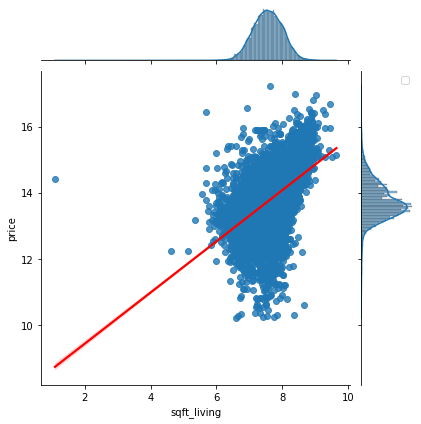

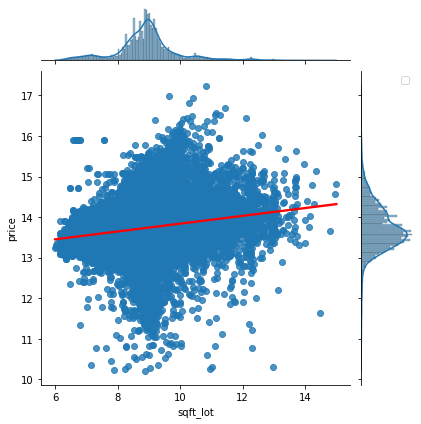

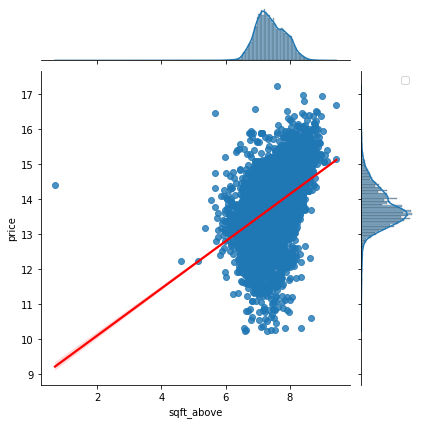

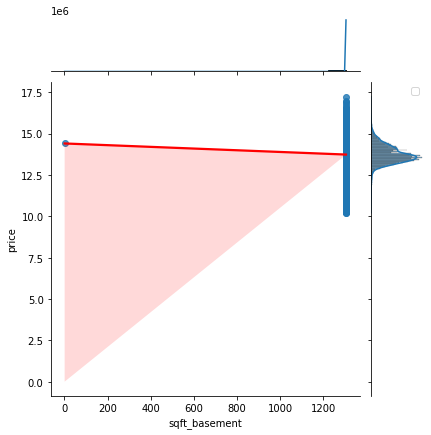

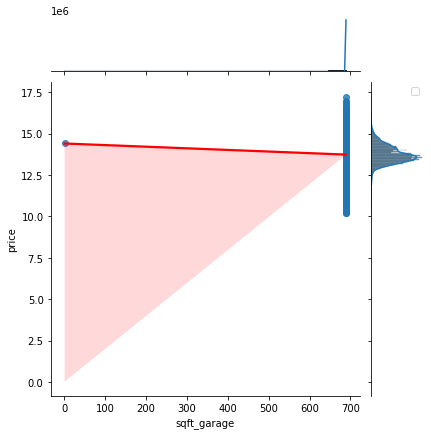

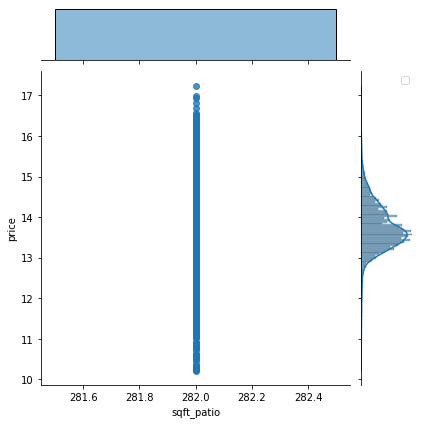

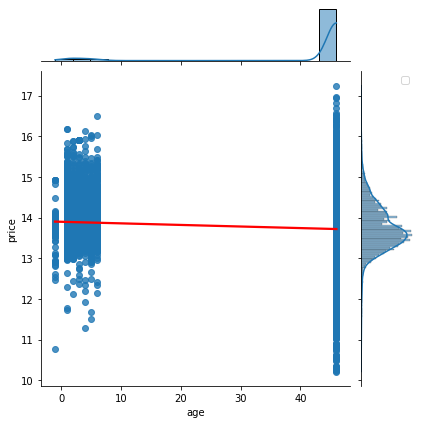

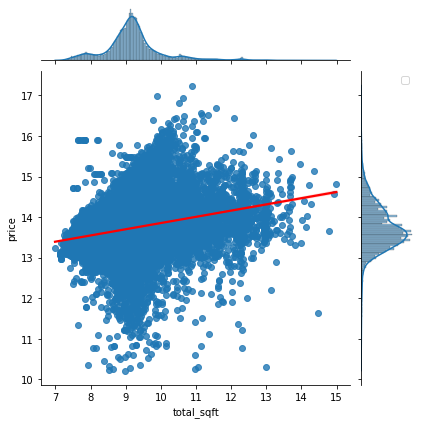

In [437]:
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_basement', 'sqft_garage','sqft_patio', 'age','total_sqft']

for column in continuous:
    sns.jointplot(x=column, y="price", data=data_trans, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

##4.8 Dummy Variables Prep

In [438]:
data_preprocessed.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age', 'total_sqft',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5',
       'bathrooms_3.0', 'bathrooms_3.5', 'bathrooms_4.0', 'bathrooms_4.5',
       'bathrooms_5.0', 'bathrooms_5.5', 'bathrooms_6.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
  

In [439]:
# dums = ['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
#        'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5',
#        'bathrooms_3.0', 'bathrooms_3.5', 'bathrooms_4.0', 'bathrooms_4.5',
#        'bathrooms_5.0', 'bathrooms_5.5', 'bathrooms_6.0', 'floors_1.5',
#        'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0',
#        'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
#        'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
#        'condition_Good', 'condition_Poor', 'condition_Very Good',
#        'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
#        'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
#        'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
#        'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
#        'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
#        'heat_source_Oil/Solar', 'heat_source_Other',
#        'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
#        'sewer_system_PUBLIC RESTRICTED']

# for column in dums:
#     sns.jointplot(x=column, y="price", data=data_preprocessed, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
#     plt.legend()
#     plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/price_vs_cat_'+column+'.png')    
#     plt.show()

- Most continous predictors seem to linear relationship with price
- Grades has the highest number of options with high linearity, hence grade will be one of the variables for baseline model.
- Also, there seem to be a lot of houses wihtout basement given the number number of 0s, So, I want to engineer another boolean column to bucket in houses with or without basement.

###4.8.1 Feature Engineering 3


```
# Create a binary column on the preprocessed dataframe for whether a house  have basement or not so as to include that in the model.  
```

In [440]:
# create basement boolean column
data_preprocessed['basement'] = np.where((data_preprocessed['sqft_basement'] != 0), 1, 0)
data_preprocessed.head(2)

,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,total_sqft,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_5.5,bathrooms_6.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,floors_4.0,waterfront_YES,greenbelt_YES,nuisance_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,basement
0,2022-05-24,13.422468,7.073270,8.873468,7.073270,1305,689,282,1973,1998,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,46,9.026418,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,2021-12-13,13.732129,7.926603,8.810310,7.358831,1305,689,282,1973,1998,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,46,9.156201,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1


## 5.0 Model Iteration

As stated above, I have decided to work with `total_sqft`, `age` and `sqft_living` in lieu of `sqft_lot`, `yr_built` and `sqft_above` respectively.

Also Leaving `date, address long` and `lat` out of the predictor variables as they are not much relevance in the model

In [441]:
data_preprocessed.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age', 'total_sqft',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5',
       'bathrooms_3.0', 'bathrooms_3.5', 'bathrooms_4.0', 'bathrooms_4.5',
       'bathrooms_5.0', 'bathrooms_5.5', 'bathrooms_6.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
  

In [442]:
preds_cols_2 = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'age', 'total_sqft',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5',
       'bathrooms_3.0', 'bathrooms_3.5', 'bathrooms_4.0', 'bathrooms_4.5',
       'bathrooms_5.0', 'bathrooms_5.5', 'bathrooms_6.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED']
# preds_cols_2

In [443]:
#data_preprocessed.info()

In [444]:
# features_2 = data_preprocessed[preds_cols_2]
# features_2.sample(3)

In [445]:
# target_2 = data_preprocessed['price']
# target_2.head()

In [446]:
y_2 = data_preprocessed['price']
X_2 = data_preprocessed[preds_cols_2]

model_2 = sm.OLS(y_2, sm.add_constant(X_2))
results_2 = model_2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [447]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     492.1
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        06:41:30   Log-Likelihood:                -16454.
No. Observations:               30155   AIC:                         3.303e+04
Df Residuals:                   30096   BIC:                         3.352e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
sqft_livin

### 5.1 Interpretation
- Our model is responsible for `52%` in price variability, and increase from the baseline model, but still quite low
- Model is good overall because the p-value of 0.00 is less that 0.05
- Interpreting the constatnt and some of the Coefficients:
  - If all predictorsn are 0, the price of house will be `194,000 USD`
  - For every sqft increase in sqft_living, we have over `374,900 USD` increase in price
  - For every sqft increase in total land space (total_sqft), we have `88,630 USD` increase in price

```
# There are number of variables with high p-values and with negative impact on the pricing, 
I would remove those in the next model iteration.
```

Evaluating Mean Absolute Error & Root Mean Square Error

In [448]:
#Define function for linear regression
# use fitted model to generate predictions for 
# linreg = LinearRegression()
# def lin_reg(X, y):  
#     linreg.fit(X_2, y_2)
#     y_hat = linreg.predict(X_2)
#     print('R_squared Score:', linreg.score(X_2, y_2))
#     print('Mean Absolute Error:', mae(y_2, y_hat))
#     print('Root Mean Squared Error test:', np.sqrt(mse(y_2, y_hat)))
#     print('Mean Predicted Selling Price:', y_hat.mean())
#     print('Mean Selling Price:', y_2.mean())
#     return linreg
lin_reg(X_2,y_2)

R_squared Score: 0.4867759672561358
Mean Absolute Error: 0.29863149584607596
Root Mean Squared Error test: 0.4175719440623695
Mean Predicted Selling Price: 13.734791038689023
Mean Selling Price: 13.734801516907833


LinearRegression()

In [449]:
# use fitted model to generate predictions for 
# y_pred_2 = results_2.predict(sm.add_constant(X_2)) 
# mae(y_2, y_pred_2)

In [450]:
# mse(y_2, y_pred_2, squared=False)

Interpretation
- MAE means that our model is off by `339,276 USD` which is quite bad

### 5.1 Model Validation

In [451]:
# def cross_validation(X_2, y_2):
#     score = cross_val_score(linreg, X_2, y_2,cv=5, scoring="r2")
#     print('R_squared Mean Score:',score.mean())
#     print(score)
# cross_validation(X_2,y_2)

- The cross-validation result is positive, so the line of best fit, fits better than a horizontal line. 
- I will try some different feature selection techniques before fitting model with whole set.

#### 5.2.1 Recursive Feature Eliminator

5.2.1.1 RFECV

In [452]:
# Create recursive feature eliminator that scores features by mean squared errors
from sklearn.feature_selection import RFECV
from sklearn import linear_model
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_2, y_2)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [453]:
selected_rfe = X_2.columns[selector.support_]
removed_rfe = X_2.columns[~selector.support_]

In [454]:
print(len(list(selected_rfe)))
print(len(list(removed_rfe)))

23
39


In [455]:
selected_rfe

Index(['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'bedrooms_4', 'bathrooms_6.0', 'waterfront_YES',
       'view_EXCELLENT', 'condition_Poor', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'sewer_system_PRIVATE RESTRICTED'],
      dtype='object')

In [456]:
removed_rfe

Index(['age', 'total_sqft', 'bedrooms_2', 'bedrooms_3', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0',
       'bathrooms_2.5', 'bathrooms_3.0', 'bathrooms_3.5', 'bathrooms_4.0',
       'bathrooms_4.5', 'bathrooms_5.0', 'bathrooms_5.5', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0',
       'greenbelt_YES', 'nuisance_YES', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Very Good',
       'grade_9 Better', 'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

`RFECV test did not reccomend removing any features, will try KBest F test with n = 30 to see if it makes any difference`.

5.2.1.2 KBest Test

In [457]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=45)
selector.fit(X_2, y_2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


SelectKBest(k=45, score_func=<function f_regression at 0x7fcae3b8f950>)

In [458]:
selected_columns = X_2.columns[selector.get_support()]
removed_columns = X_2.columns[~selector.get_support()]

In [459]:
# check removed columns
removed_columns

Index(['sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'floors_1.5', 'floors_3.0', 'floors_3.5', 'floors_4.0',
       'nuisance_YES', 'condition_Very Good', 'grade_2 Substandard',
       'heat_source_Electricity/Solar', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [460]:
# check selected columns
selected_columns

Index(['sqft_living', 'age', 'total_sqft', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1.0',
       'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0',
       'bathrooms_3.5', 'bathrooms_4.0', 'bathrooms_4.5', 'bathrooms_5.0',
       'bathrooms_5.5', 'bathrooms_6.0', 'floors_2.0', 'floors_2.5',
       'waterfront_YES', 'greenbelt_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'sewer_system_PUBLIC'],
      dtype='object')

### Final Model

In [461]:
#preds_cols_3 = data_preprocessed[selected_columns]
# preds_cols_3 = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio',
      #  'yr_renovated', 'age', 'total_sqft', 'bedrooms_2', 'bedrooms_3',
      #  'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1.0',
      #  'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_3.0', 'bathrooms_3.5',
      #  'bathrooms_4.0', 'bathrooms_4.5', 'bathrooms_5.0', 'floors_2.0',
      #  'floors_2.5', 'waterfront_YES', 'greenbelt_YES', 'view_EXCELLENT',
      #  'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
      #  'condition_Poor', 'grade_10 Very Good', 'grade_11 Excellent',
      #  'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
      #  'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
      #  'grade_8 Good', 'grade_9 Better', 'heat_source_Gas',
      #  'heat_source_Gas/Solar', 'heat_source_Oil', 'sewer_system_PUBLIC']
#preds_cols_3

In [462]:
#features_3 = data_preprocessed[selected_columns]
#features_3.sample(3)

In [463]:
# target_3 = data_preprocessed['price']
# target_3.head()

In [464]:
y_3 = target_3 = data_preprocessed['price']
X_3 = data_preprocessed[selected_columns]
#X_3 = data_preprocessed[selected_rfe]
#X_3 = data_preprocessed[removed_rfe]


model_3 = sm.OLS(y_3, sm.add_constant(X_3))
results_3 = model_3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [465]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     612.1
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        06:41:44   Log-Likelihood:                -16716.
No. Observations:               30155   AIC:                         3.352e+04
Df Residuals:                   30109   BIC:                         3.391e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.61

### 5.1 Interpretation
- Our model is responsible for `48%` in price variability, and increase from the baseline model, but still quite low
- Model is good overall because the p-value of 0.00 is less that 0.05
- Interpreting the constatnt and some of the Coefficients:
  - If all predictorsn are 0, the price of house will be `10.71 USD`
  - For every sqft increase in sqft_living, we have over `374,900 USD` increase in price
  - For every sqft increase in total land space (total_sqft), we have `88,630 USD` increase in price
les with high p-values and with negative impact on the pricing, 
I would remove those in the next model iteration.

Evaluating Mean Absolute Error & Root Mean Square Error

In [466]:
#Define function for linear regression
# use fitted model to generate predictions for 
# linreg = LinearRegression()
# def lin_reg(X, y):  
#     linreg.fit(X_3, y_3)
#     y_hat = linreg.predict(X_3)
#     print('R_squared Score:', linreg.score(X_3, y_3))
#     print('Mean Absolute Error:', mae(y_3, y_hat))
#     print('Root Mean Squared Error test:', np.sqrt(mse(y_3, y_hat)))
#     print('Mean Predicted Selling Price:', y_hat.mean())
#     print('Mean Selling Price:', y_3.mean())
    # return linreg
lin_reg(X_3,y_3)

R_squared Score: 0.4777578179785952
Mean Absolute Error: 0.3024711410803201
Root Mean Squared Error test: 0.42122466414445453
Mean Predicted Selling Price: 13.734801516907833
Mean Selling Price: 13.734801516907833


LinearRegression()

Interpretation
- MAE means that our model is off by `0.3 USD` which is quite ood compare to first model iteration
- The KBest test with k=30 actually performed better (0.42k RMSE vs 622k RMSE)

####Review Feature importance from coefficients for Model2 & Final Model:




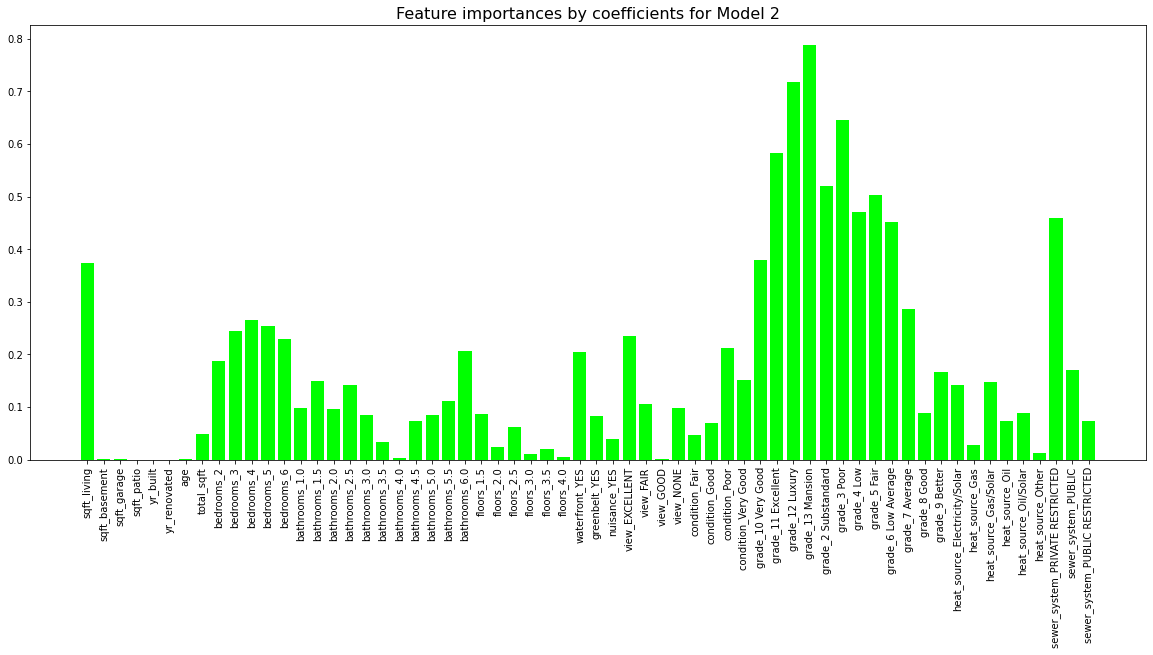

In [467]:
# Visualize important features by coefficients in Model 2
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_2, y_2)
importance = np.abs(ridge.coef_)
feature_names = X_2.columns
plt.figure(figsize=(20,8))
plt.bar(height=importance, x=feature_names, color="lime")
plt.xticks(rotation = 90, fontsize=10, fontname='silom')
plt.yticks(fontsize=10, fontname='silom')
plt.title('Feature importances by coefficients for Model 2', fontsize=16, fontname='silom' )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/model2_featureImportance_by_coefs.png')

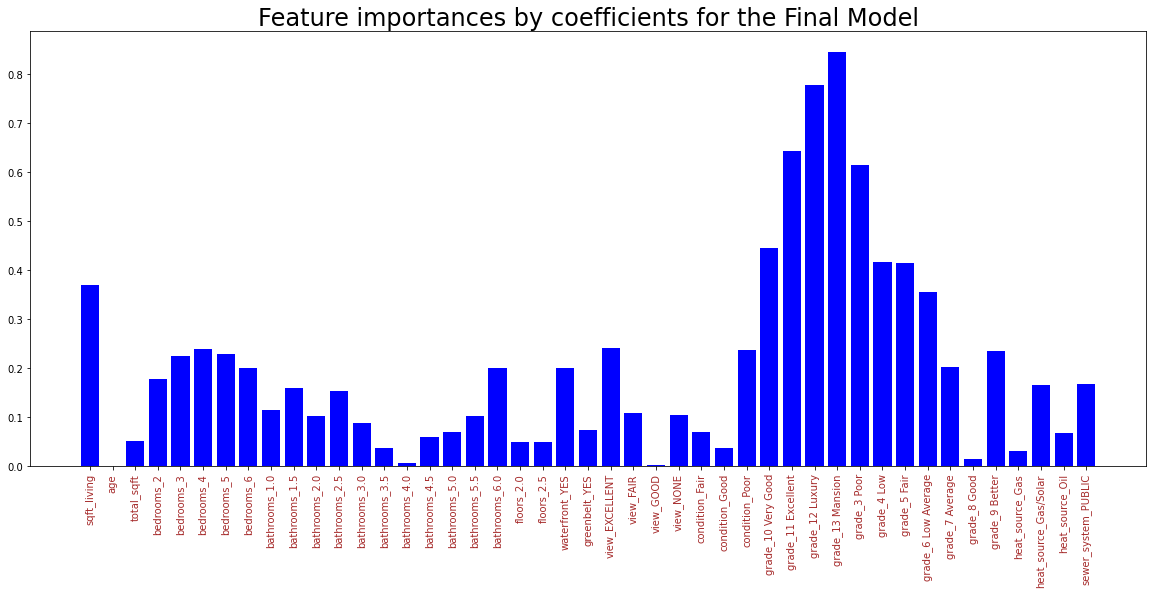

In [468]:
# Visualize important features by coefficients in Final Model
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_3, y_3)
importance = np.abs(ridge.coef_)
feature_names = X_3.columns
plt.figure(figsize=(20,8))
plt.bar(height=importance, x=feature_names, color="blue")
plt.xticks(rotation = 90, fontsize=10, fontname='silom', color="brown")
plt.yticks(fontsize=10, fontname='silom')
plt.title('Feature importances by coefficients for the Final Model', fontsize=24, fontname='silom' )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/final_model_feature_importance_by_coefs.png')

Observation
- From the two charts `sqft_basement`,`sqft_garage`, `sqft_patio` and yr_renovated that are commong to the model 2 and final model are have no significance
- That could explain why the R-square of the 2nd and final model is approximately thesame even though they vary in the number of features
- When Ielimnated the feature above however, R-Squared for Model dropped to` 0.495` from `0.503`

## Regression Results
- Having created models with different... such as 30, 40, 50, 55, I found....

####5.1.1 Examining Reference Categories for coeefficient intepretation


In [469]:
# #get the value count of bedroom category prior to one-hot encoding
# data_trans['bedrooms'].value_counts()

In [470]:
# #get the value count of bathroom category prior to one-hot encoding
# data_trans['bathrooms'].value_counts()

In [471]:
# #get the value count of grade category prior to one-hot encoding
# data_trans['grade'].value_counts()

*Bedrooms*

Because 1 does not appear in our one-hot encoded variable for bedroom (we only have `bedrooms_2`,`bedrooms_3`,`bedrooms_4`,`bedrooms_5` & `bedrooms_6`), we know that 1 is the reference category. Thus we can interpret the coefficients of `bedrooms_2`,`bedrooms_3`,`bedrooms_4`,`bedrooms_5` & `bedrooms_6` as follows:

- Compared to a house with one bedroom, we see an associated decrease of `47,800 USD` in houses with 2 bedrooms, `4,800 USD` in house with 3 bedrooms `45,100 USD` in house with 5 bedrooms and so on

*Bathrooms*

Because 1 does not appear in our one-hot encoded variable for bedroom (we only have `bedrooms_2`,`bedrooms_3`,`bedrooms_4`,`bedrooms_5` & `bedrooms_6`), we know that 1 is the reference category. Thus we can interpret the coefficients of `bedrooms_2`,`bedrooms_3`,`bedrooms_4`,`bedrooms_5` & `bedrooms_6` as follows:

- Compared to a house with one bedroom, we see an associated decrease of `47,800 USD` in houses with 2 bedrooms, `4,800 USD` in house with 3 bedrooms `45,100 USD` in house with 5 bedrooms and so on


## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion